In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_4724\2076077583.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_counts = books.groupby('year_bin')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_4724\2076077583.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts = df.groupby('year_bin')['images'].nunique()


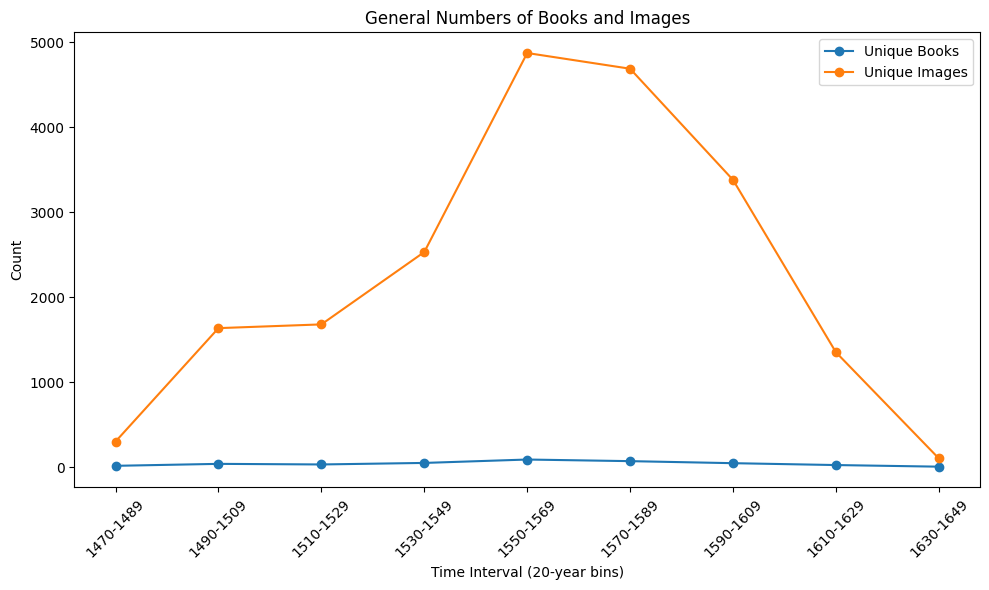

In [27]:
# Convert the 'year' columns to integers if they are not already
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create bins for the years (1470-1650, 20-year intervals)
bins = list(range(1470, 1660, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]  # labels like "1470-1489"

# Assign each year in df and books to a bin
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
books['year_bin'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Line 1: Number of unique book values per interval in books
book_counts = books.groupby('year_bin')['book'].nunique()

# Line 2: Number of unique image values per interval in df
image_counts = df.groupby('year_bin')['images'].nunique()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the unique books line
plt.plot(book_counts.index, book_counts.values, label='Unique Books', marker='o', color='tab:blue')

# Plot the unique images line
plt.plot(image_counts.index, image_counts.values, label='Unique Images', marker='o', color='tab:orange')

# Customize the plot
plt.title('General Numbers of Books and Images')
plt.xlabel('Time Interval (20-year bins)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


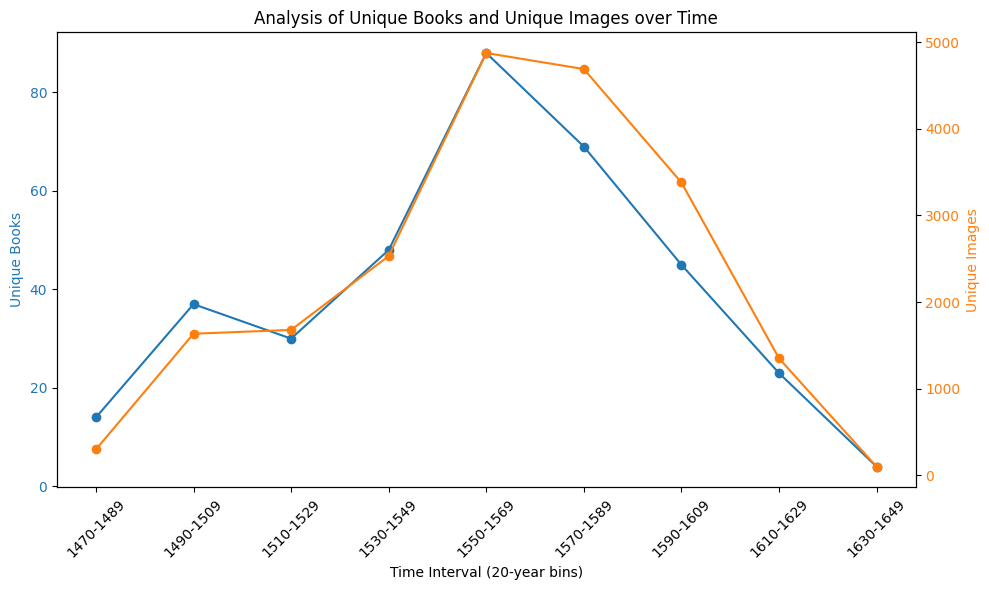

In [28]:
# Convert the 'year' columns to integers if they are not already
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create bins for the years (1470-1650, 20-year intervals)
bins = list(range(1470, 1660, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]  # labels like "1470-1489"

# Assign each year in df and books to a bin
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
books['year_bin'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Line 1: Number of unique book values per interval in books
book_counts = books.groupby('year_bin', observed=False)['book'].nunique()

# Line 2: Number of unique image values per interval in df
image_counts = df.groupby('year_bin', observed=False)['images'].nunique()

# Create the plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line (unique books) on the left Y-axis
ax1.plot(book_counts.index, book_counts.values, label='Unique Books', marker='o', color='tab:blue')
ax1.set_xlabel('Time Interval (20-year bins)')
ax1.set_ylabel('Unique Books', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second Y-axis to plot unique images
ax2 = ax1.twinx()  
ax2.plot(image_counts.index, image_counts.values, label='Unique Images', marker='o', color='tab:orange')
ax2.set_ylabel('Unique Images', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Customize the plot
plt.title('Analysis of Unique Books and Unique Images over Time')

# Adjust x-axis labels to show rotated years without the warning
ax1.set_xticks(range(len(book_counts.index)))  # Set the tick positions
ax1.set_xticklabels(book_counts.index, rotation=45)  # Set the labels

fig.tight_layout()

# Show the plot
plt.show()


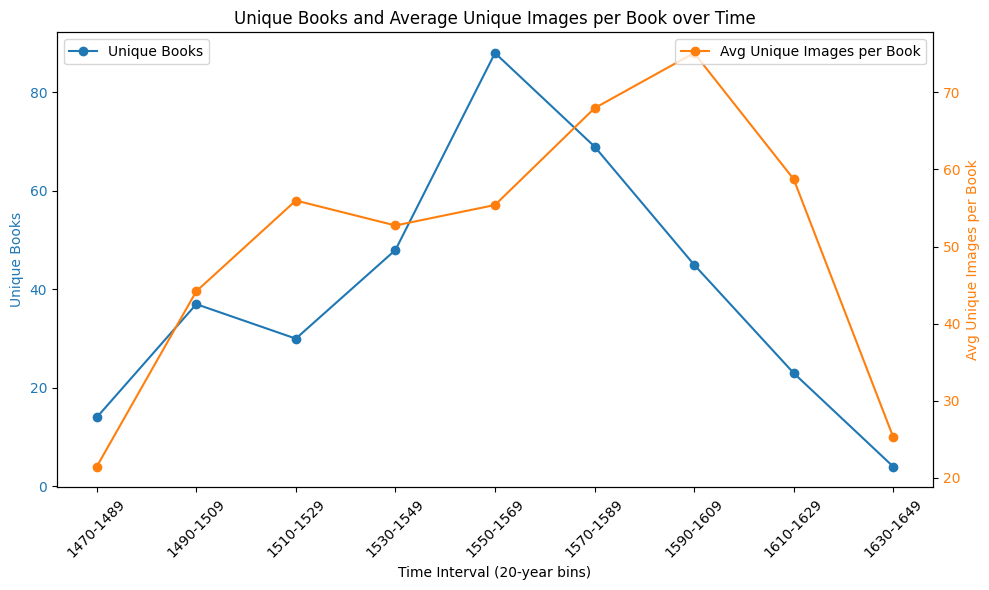

In [29]:
# Convert the 'year' columns to integers if they are not already
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create bins for the years (1470-1650, 20-year intervals)
bins = list(range(1470, 1660, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]  # labels like "1470-1489"

# Assign each year in df and books to a bin
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
books['year_bin'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# 1. Number of unique books per time interval (from the 'books' dataframe)
book_counts_per_bin = books.groupby('year_bin', observed=False)['book'].nunique()

# 2. Calculate the total number of unique images for each book per time interval (from the 'df' dataframe)
# Group by 'year_bin' and 'book' to count unique images associated with each book
book_image_counts = df.groupby(['year_bin', 'book'], observed=False)['images'].nunique()

# 3. For each year_bin, calculate the total number of unique images
# Pass 'observed=False' to avoid FutureWarning
total_images_per_bin = book_image_counts.groupby('year_bin', observed=False).sum()

# 4. Calculate the average number of unique images per unique book in each time interval
avg_images_per_book_per_bin = total_images_per_bin / book_counts_per_bin

# Create the plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of unique books per time interval on the first Y-axis
ax1.plot(book_counts_per_bin.index, book_counts_per_bin.values, label='Unique Books', marker='o', color='tab:blue')
ax1.set_xlabel('Time Interval (20-year bins)')
ax1.set_ylabel('Unique Books', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second Y-axis to plot the average number of unique images per book
ax2 = ax1.twinx()  
ax2.plot(avg_images_per_book_per_bin.index, avg_images_per_book_per_bin.values, label='Avg Unique Images per Book', marker='o', color='tab:orange')
ax2.set_ylabel('Avg Unique Images per Book', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Customize the plot
plt.title('Unique Books and Average Unique Images per Book over Time')

# Set the x-axis ticks and labels explicitly
ax1.set_xticks(range(len(book_counts_per_bin)))  # Set ticks at the correct positions
ax1.set_xticklabels(book_counts_per_bin.index, rotation=45)

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()


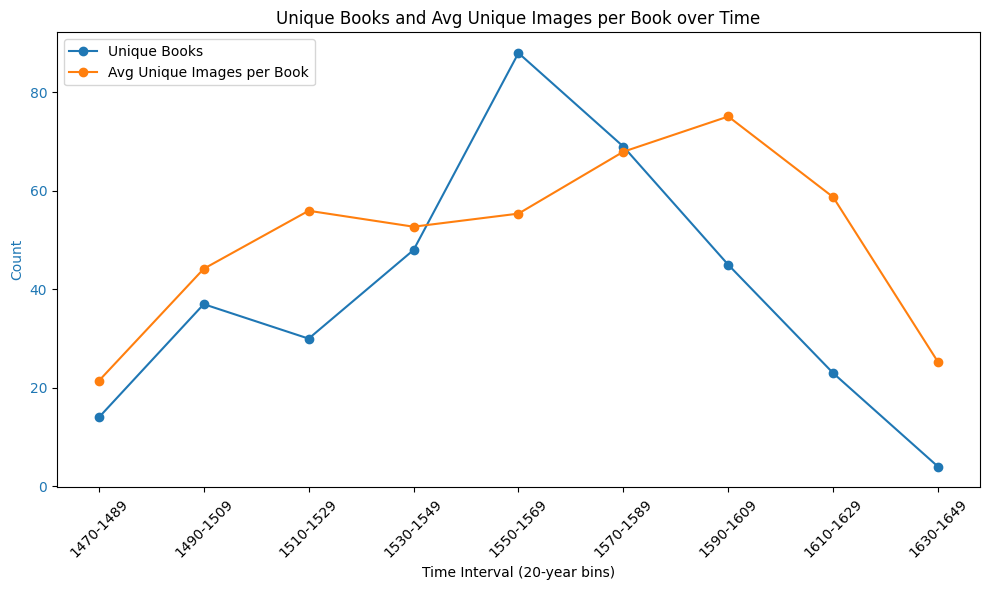

In [30]:
# Convert the 'year' columns to integers if they are not already
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create bins for the years (1470-1650, 20-year intervals)
bins = list(range(1470, 1660, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]  # labels like "1470-1489"

# Assign each year in df and books to a bin
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
books['year_bin'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# 1. Number of unique books per time interval (from the 'books' dataframe)
book_counts_per_bin = books.groupby('year_bin', observed=False)['book'].nunique()

# 2. Calculate the total number of unique images for each book per time interval (from the 'df' dataframe)
# Group by 'year_bin' and 'book' to count unique images associated with each book
book_image_counts = df.groupby(['year_bin', 'book'], observed=False)['images'].nunique()

# 3. For each year_bin, calculate the total number of unique images
total_images_per_bin = book_image_counts.groupby('year_bin', observed=False).sum()

# 4. Calculate the average number of unique images per unique book in each time interval
avg_images_per_book_per_bin = total_images_per_bin / book_counts_per_bin

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the number of unique books per time interval
ax.plot(book_counts_per_bin.index, book_counts_per_bin.values, label='Unique Books', marker='o', color='tab:blue')

# Plot the average number of unique images per book
ax.plot(avg_images_per_book_per_bin.index, avg_images_per_book_per_bin.values, label='Avg Unique Images per Book', marker='o', color='tab:orange')

# Labeling the axes
ax.set_xlabel('Time Interval (20-year bins)')
ax.set_ylabel('Count', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

# Add title and rotate x-ticks for better readability
plt.title('Unique Books and Avg Unique Images per Book over Time')

# Set x-ticks explicitly so they match the number of bins and avoid the warning
ax.set_xticks(range(len(book_counts_per_bin.index)))
ax.set_xticklabels(book_counts_per_bin.index, rotation=45)

# Add legends for both lines
ax.legend(loc='upper left')

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()


In [31]:
# Count unique 'place' values in both 'df' and 'books' DataFrames
unique_places_in_df = df['place'].nunique()
unique_places_in_books = books['place'].nunique()

# Print the results
print(f"Unique places in 'df': {unique_places_in_df}")
print(f"Unique places in 'books': {unique_places_in_books}")


Unique places in 'df': 42
Unique places in 'books': 43


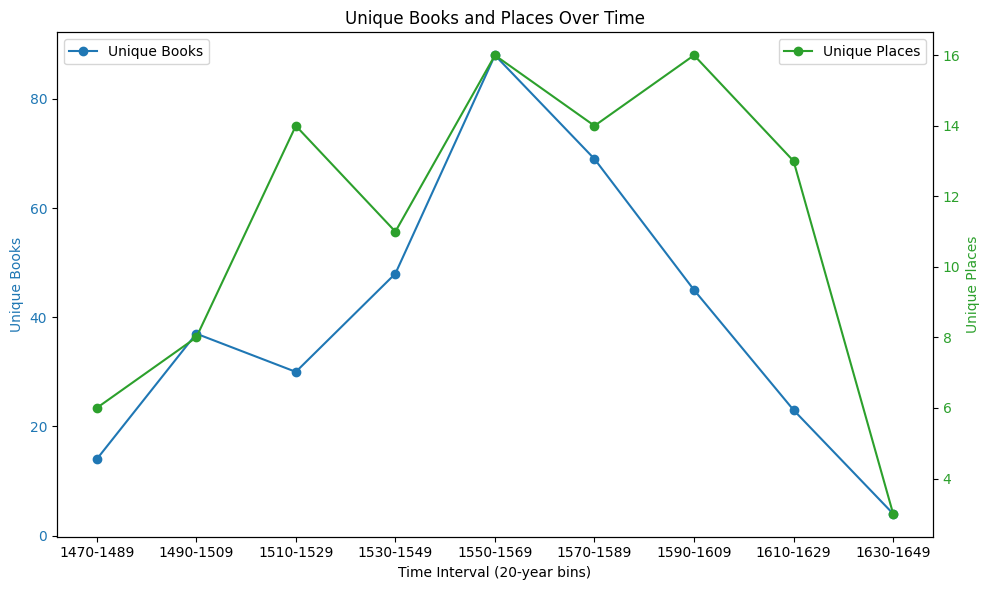

           Unique Books  Unique Places
year_bin                              
1470-1489            14              6
1490-1509            37              8
1510-1529            30             14
1530-1549            48             11
1550-1569            88             16
1570-1589            69             14
1590-1609            45             16
1610-1629            23             13
1630-1649             4              3


In [32]:

# Convert 'year' columns to integers if not already done
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create bins for the years (1470-1650, 20-year intervals)
bins = list(range(1470, 1660, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]  # labels like "1470-1489"

# Assign each year in df and books to a bin
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
books['year_bin'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Step 1: Number of unique book values per interval in books
book_counts = books.groupby('year_bin', observed=False)['book'].nunique()

# Step 2: Number of unique place values associated with the book values in books per interval
place_counts = books.groupby('year_bin', observed=False)['place'].nunique()

# Combine all counts into a single DataFrame
summary = pd.DataFrame({
    'Unique Books': book_counts,
    'Unique Places': place_counts
})

# Create the plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot unique books on the first Y-axis (ax1)
ax1.plot(summary.index, summary['Unique Books'], label='Unique Books', marker='o', color='tab:blue')
ax1.set_xlabel('Time Interval (20-year bins)')
ax1.set_ylabel('Unique Books', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second Y-axis for unique places (ax2)
ax2 = ax1.twinx()  
ax2.plot(summary.index, summary['Unique Places'], label='Unique Places', marker='o', color='tab:green')
ax2.set_ylabel('Unique Places', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set title and legend
ax1.set_title('Unique Books and Places Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
fig.tight_layout()
plt.show()

# Display the summary table
print(summary)


In [33]:
# Group by 'place' and count the number of unique 'book' values for each 'place'
unique_books_per_place = books.groupby('place')['book'].nunique()

# Sort the result by the number of unique books in descending order
sorted_unique_books_per_place = unique_books_per_place.sort_values(ascending=False)

# Print the sorted result
print(sorted_unique_books_per_place)


place
Venice                        70
Paris                         69
Wittenberg                    48
Antwerp                       22
Leipzig                       19
Frankfurt (Main)              17
Lyon                          16
Cologne                       15
London                        13
Rome                           6
Strasbourg                     5
Seville                        5
Leiden                         4
Milan                          3
Saint Gervais                  3
Florence                       3
Kraków                         3
Salamanca                      3
Lisbon                         3
Bologna                        2
Madrid                         2
Sine loco                      2
Basel                          2
Lemgo                          2
Dijon                          2
Valladolid                     2
Perugia                        2
Siena                          1
Avignon                        1
Vienna                         1
Ferr

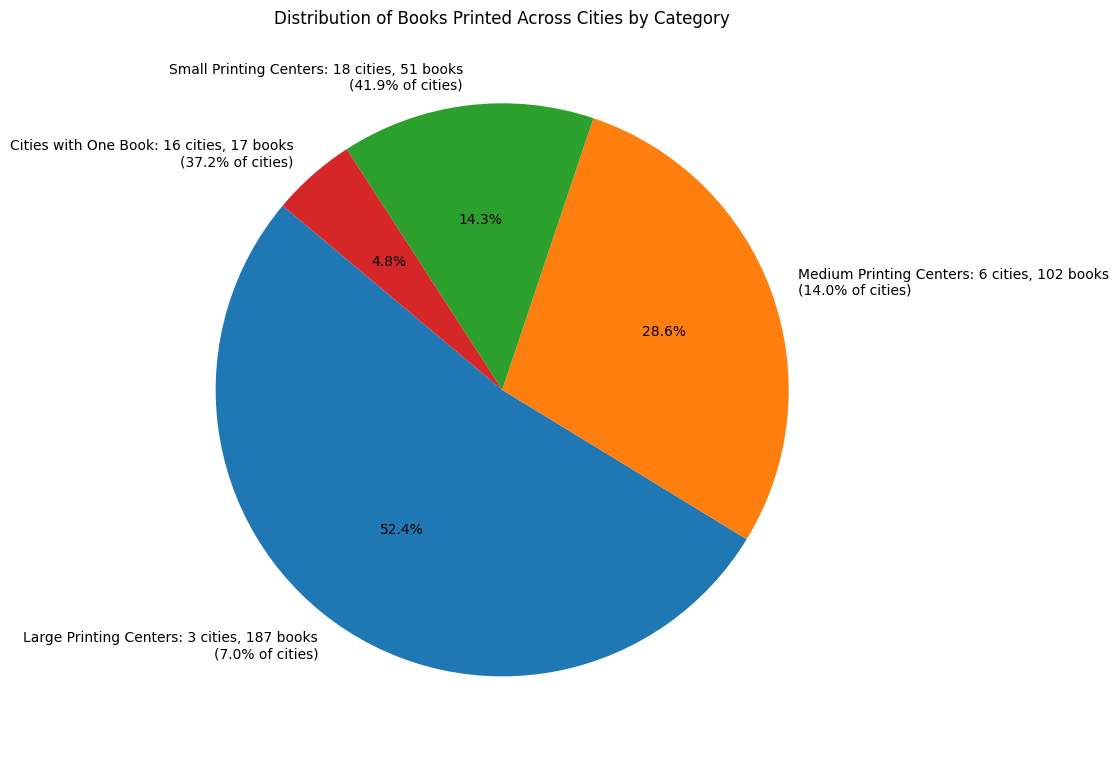

In [34]:
# Data: cities and their respective book counts
categories = ['Large Printing Centers', 'Medium Printing Centers', 'Small Printing Centers', 'Cities with One Book']

# Total book counts for each category
book_counts = [70 + 69 + 48, 22 + 19 + 17 + 16 + 15 + 13, 
               6 + 5 + 5 + 4 + 3 + 3 + 3 + 3 + 3 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2, 
               1 * 17]  # One book per city in the last category

# City names in each category
large_cities = ['Venice (70)', 'Paris (69)', 'Wittenberg (48)']
medium_cities = ['Antwerp (22)', 'Leipzig (19)', 'Frankfurt (Main) (17)', 'Lyon (16)', 'Cologne (15)', 'London (13)']
small_cities = ['Rome (6)', 'Strasbourg (5)', 'Seville (5)', 'Leiden (4)', 'Milan (3)', 'Saint Gervais (3)', 
                'Florence (3)', 'Kraków (3)', 'Salamanca (3)', 'Lisbon (3)', 'Bologna (2)', 'Madrid (2)', 
                'Sine loco (2)', 'Basel (2)', 'Lemgo (2)', 'Dijon (2)', 'Valladolid (2)', 'Perugia (2)']
one_book_cities = ['Siena (1)', 'Avignon (1)', 'Vienna (1)', 'Ferrara (1)', 'Padua (1)', 'Nuremberg (1)', 
                   'Neustadt an der Weinstraße (1)', 'Mexico City (1)', 'Mainz (1)', 'Coimbra (1)', 'Leuven (1)', 
                   'Ingolstadt (1)', 'Heidelberg (1)', 'Geneva (1)', 'Dillingen an der Donau (1)', 'Alcalá de Henares (1)']

# Combine cities into a list for each category
category_labels = [
    f"{categories[0]}: {len(large_cities)} cities, {book_counts[0]} books",
    f"{categories[1]}: {len(medium_cities)} cities, {book_counts[1]} books",
    f"{categories[2]}: {len(small_cities)} cities, {book_counts[2]} books",
    f"{categories[3]}: {len(one_book_cities)} cities, {book_counts[3]} books"
]

# Total number of cities (sum of all cities across categories)
total_cities = len(large_cities) + len(medium_cities) + len(small_cities) + len(one_book_cities)

# Calculate the percentage of cities in each category
category_percentages = [len(large_cities) / total_cities * 100,
                        len(medium_cities) / total_cities * 100,
                        len(small_cities) / total_cities * 100,
                        len(one_book_cities) / total_cities * 100]

# Append percentages to the labels
category_labels = [
    f"{categories[0]}: {len(large_cities)} cities, {book_counts[0]} books\n({category_percentages[0]:.1f}% of cities)",
    f"{categories[1]}: {len(medium_cities)} cities, {book_counts[1]} books\n({category_percentages[1]:.1f}% of cities)",
    f"{categories[2]}: {len(small_cities)} cities, {book_counts[2]} books\n({category_percentages[2]:.1f}% of cities)",
    f"{categories[3]}: {len(one_book_cities)} cities, {book_counts[3]} books\n({category_percentages[3]:.1f}% of cities)"
]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(book_counts, labels=category_labels, autopct='%1.1f%%', startangle=140)

# Title
plt.title('Distribution of Books Printed Across Cities by Category')

# Display the chart
plt.tight_layout()
plt.show()


In [35]:
# Merge df and books on the 'book' column
final_df = df.merge(books[['book', 'place', 'year', 'num_pages']], on='book', how='left')

# Keep only the desired columns: 'book', 'images', 'year', 'place', 'num_pages'
final_df = final_df[['book', 'images', 'year_x', 'place_x', 'num_pages']]

# Step 2: Rename columns as required
final_df.rename(columns={
    'year_x': 'year',
    'place_x': 'place',
    'cluster': 'cluster_visualization_level'
}, inplace=True)

final_df


book  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   

                                                  images  year       place  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
...                                                  ...   ...         ...   
20949  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20950  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20951  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20952  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20953  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   

      num_pages  
0            65  
1            65  
2            65  
3            65  
4            65  
...         ...  
20949       257  
20950       257  
20951       257  
20952       257  
20953       257  

[20954 rows x 5 columns]

In [36]:
# Step 1: Ensure 'num_pages' is numeric and coerce errors to NaN (if any)
final_df['num_pages'] = pd.to_numeric(final_df['num_pages'], errors='coerce')

# Step 2: Count the number of unique 'images' for each 'book'
unique_images_count = final_df.groupby('book')['images'].nunique()

# Step 3: Map unique image counts to the 'final_df' based on 'book' and calculate 'num_images_per_page'
final_df['num_images_per_page'] = final_df['book'].map(unique_images_count) / final_df['num_pages']

# Step 4: Check the updated 'final_df' to ensure correct calculations
final_df


book  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   

                                                  images  year       place  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
...                                                  ...   ...         ...   
20949  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20950  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20951  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20952  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20953  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   

       num_pages  num_images_per_page  
0             65             0.369231  
1             65             0.369231  
2             65             0.369231  
3             65             0.369231  
4             65             0.369231  
...          ...                  ...  
20949        257             0.108949  
20950        257             0.108949  
20951        257             0.108949  
20952        257             0.108949  
20953        257             0.108949  

[20954 rows x 6 columns]

In [37]:
# Iterate over each column and print the column name and the number of unique values
for column in final_df.columns:
    unique_count = final_df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'book' has 342 unique values.
Column 'images' has 20540 unique values.
Column 'year' has 132 unique values.
Column 'place' has 42 unique values.
Column 'num_pages' has 210 unique values.
Column 'num_images_per_page' has 307 unique values.


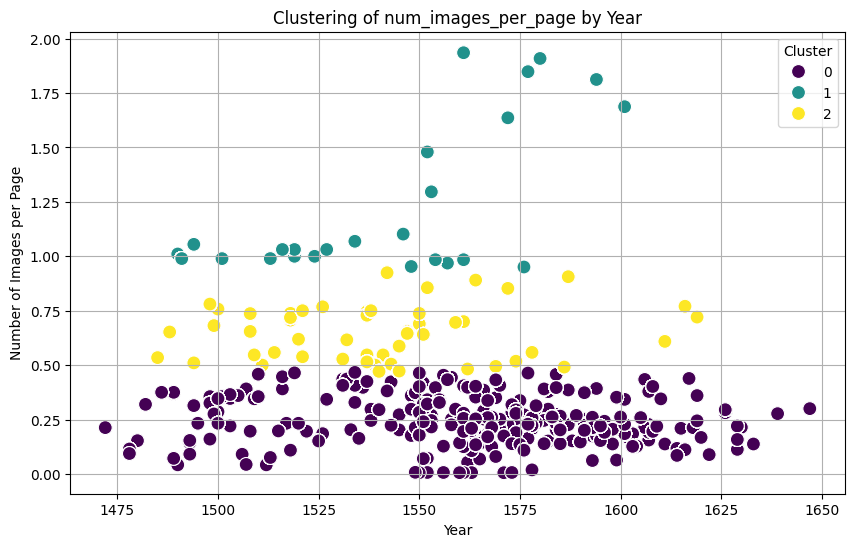

In [38]:
#clustering the books by number of images per page

# Step 1: Extract the 'num_images_per_page' column for clustering
X = final_df[['num_images_per_page']]

# Step 2: Apply K-Means clustering (you can choose the number of clusters, say k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['cluster'] = kmeans.fit_predict(X)

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))

# Plot the clustered data
sns.scatterplot(data=final_df, x='year', y='num_images_per_page', hue='cluster', palette='viridis', s=100, marker='o')

# Customize the plot
plt.title('Clustering of num_images_per_page by Year')
plt.xlabel('Year')
plt.ylabel('Number of Images per Page')
plt.legend(title='Cluster', loc='best')
plt.grid(True)

# Show the plot
plt.show()


In [39]:
# Step 1: Group the final_df by 'cluster' and calculate the desired information
cluster_info = final_df.groupby('cluster').agg(
    num_books=('book', 'nunique'),  # Count unique books in each cluster
    min_images_per_page=('num_images_per_page', 'min'),  # Min value of 'num_images_per_page'
    max_images_per_page=('num_images_per_page', 'max')   # Max value of 'num_images_per_page'
).reset_index()

# Step 2: Print the results for each cluster
for index, row in cluster_info.iterrows():
    print(f"Cluster {row['cluster']} - Number of Books: {row['num_books']}")
    print(f"  Range of num_images_per_page: {row['min_images_per_page']} to {row['max_images_per_page']}")
    print("-" * 50)


Cluster 0.0 - Number of Books: 264.0
  Range of num_images_per_page: 0.005494505494505495 to 0.4666666666666667
--------------------------------------------------
Cluster 1.0 - Number of Books: 25.0
  Range of num_images_per_page: 0.9508196721311475 to 1.935483870967742
--------------------------------------------------
Cluster 2.0 - Number of Books: 53.0
  Range of num_images_per_page: 0.47115384615384615 to 0.9245283018867925
--------------------------------------------------


In [40]:
# Step 1: Define the mapping of cluster numbers to titles
cluster_titles = {
    0: 'Low Images density',
    1: 'Medium Images density',
    2: 'High Images density'
}

# Step 2: Replace the cluster numbers with the corresponding titles
final_df['cluster'] = final_df['cluster'].map(cluster_titles)

In [41]:
final_df

book  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   

                                                  images  year       place  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
...                                                  ...   ...         ...   
20949  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20950  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20951  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20952  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20953  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   

       num_pages  num_images_per_page             cluster  
0             65             0.369231  Low Images density  
1             65             0.369231  Low Images density  
2             65             0.369231  Low Images density  
3             65             0.369231  Low Images density  
4             65             0.369231  Low Images density  
...          ...                  ...                 ...  
20949        257             0.108949  Low Images density  
20950        257             0.108949  Low Images density  
20951        257             0.108949  Low Images density  
20952        257             0.108949  Low Images density  
20953        257             0.108949  Low Images density  

[20954 rows x 7 columns]

In [42]:
#inserting city categories

# Cleaned city names without the numbers in parentheses
large_cities = ['Venice', 'Paris', 'Wittenberg']
medium_cities = ['Antwerp', 'Leipzig', 'Frankfurt (Main)', 'Lyon', 'Cologne', 'London']
small_cities = ['Rome', 'Strasbourg', 'Seville', 'Leiden', 'Milan', 'Saint Gervais', 
                'Florence', 'Kraków', 'Salamanca', 'Lisbon', 'Bologna', 'Madrid', 
                'Sine loco', 'Basel', 'Lemgo', 'Dijon', 'Valladolid', 'Perugia']
one_book_cities = ['Siena', 'Avignon', 'Vienna', 'Ferrara', 'Padua', 'Nuremberg', 
                   'Neustadt an der Weinstraße', 'Mexico City', 'Mainz', 'Coimbra', 
                   'Leuven', 'Ingolstadt', 'Heidelberg', 'Geneva', 'Dillingen an der Donau', 
                   'Alcalá de Henares']

# Step 1: Create a function to assign place category
def get_place_category(place_name):
    # Strip any extra spaces and check if city name matches the cleaned lists
    place_name_cleaned = place_name.split(' (')[0]  # Remove any number in parentheses

    if place_name_cleaned in large_cities:
        return 'Large City'
    elif place_name_cleaned in medium_cities:
        return 'Medium City'
    elif place_name_cleaned in small_cities:
        return 'Small City'
    elif place_name_cleaned in one_book_cities:
        return 'One Book City'
    else:
        return 'Unknown'  # Handle any city not in the lists

# Step 2: Apply the function to the 'place' column and create 'place_category' column
final_df['place_category'] = final_df['place'].apply(get_place_category)

# Step 3: Verify the results
final_df


book  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   

                                                  images  year       place  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
...                                                  ...   ...         ...   
20949  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20950  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20951  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20952  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20953  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   

       num_pages  num_images_per_page             cluster place_category  
0             65             0.369231  Low Images density    Medium City  
1             65             0.369231  Low Images density    Medium City  
2             65             0.369231  Low Images density    Medium City  
3             65             0.369231  Low Images density    Medium City  
4             65             0.369231  Low Images density    Medium City  
...          ...                  ...                 ...            ...  
20949        257             0.108949  Low Images density     Large City  
20950        257             0.108949  Low Images density     Large City  
20951        257             0.108949  Low Images density     Large City  
20952        257             0.108949  Low Images density     Large City  
20953        257             0.108949  Low Images density     Large City  

[20954 rows x 8 columns]

In [43]:
#fixing the problem with Frankfurt

# Replace all occurrences of 'Unknown' in 'place_category' with 'Medium Cities'
final_df['place_category'] = final_df['place_category'].replace('Unknown', 'Medium City')

In [44]:
# 1. Number of unique book values in final_df
total_unique_books = final_df['book'].nunique()
print(f"Total number of unique books in final_df: {total_unique_books}")

# 2. Number of unique book values per each place_category
unique_books_per_place_category = final_df.groupby('place_category')['book'].nunique().reset_index()
print("\nNumber of unique book values per each place_category:")
print(unique_books_per_place_category)

# 3. Number of unique book values per each cluster_visualization_level
unique_books_per_cluster_level = final_df.groupby('cluster')['book'].nunique().reset_index()
print("\nNumber of unique book values per each cluster_visualization_level:")
print(unique_books_per_cluster_level)


Total number of unique books in final_df: 342

Number of unique book values per each place_category:
  place_category  book
0     Large City   184
1    Medium City    95
2  One Book City    15
3     Small City    48

Number of unique book values per each cluster_visualization_level:
                 cluster  book
0    High Images density    53
1     Low Images density   264
2  Medium Images density    25


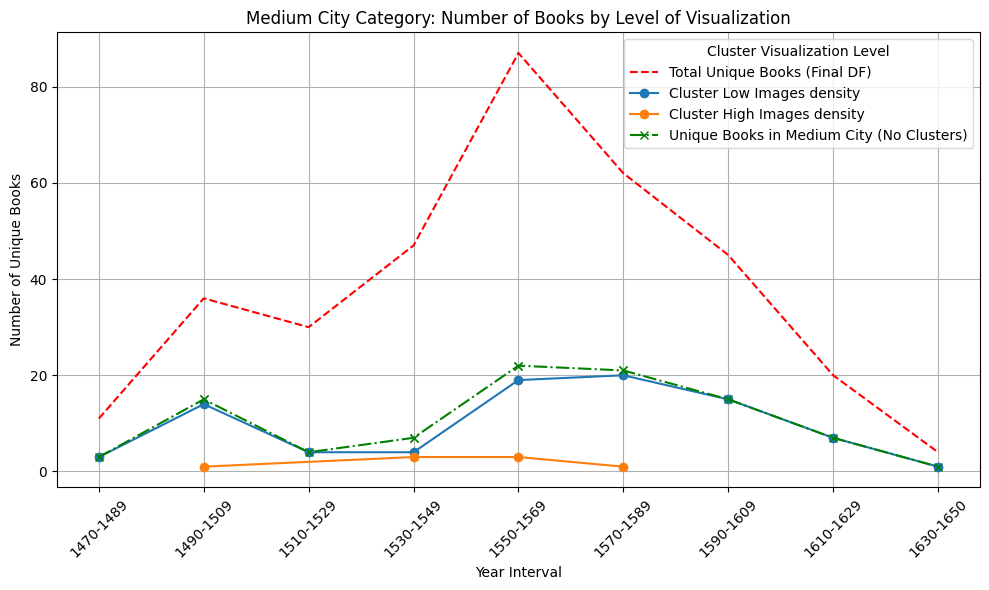

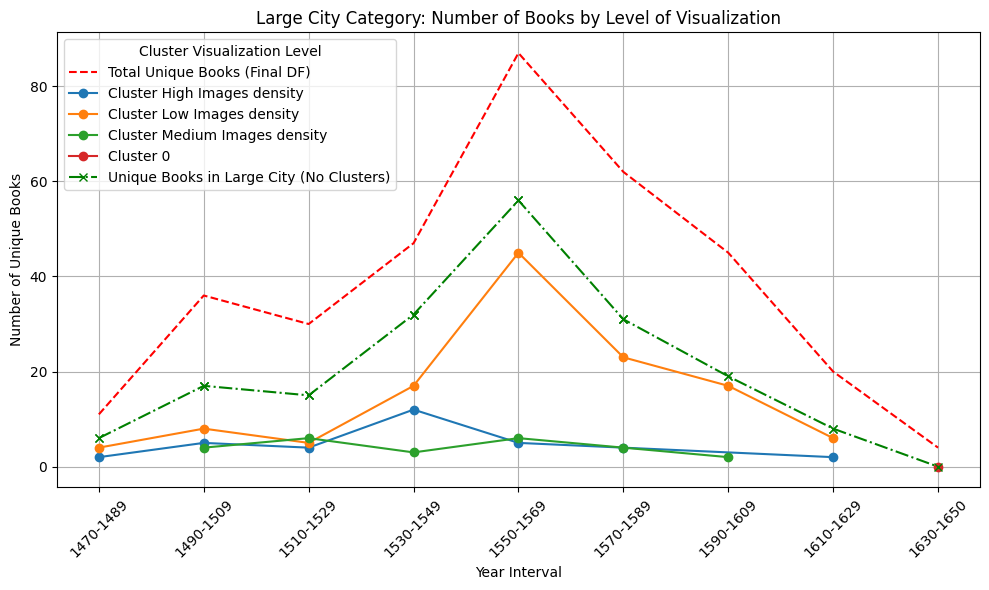

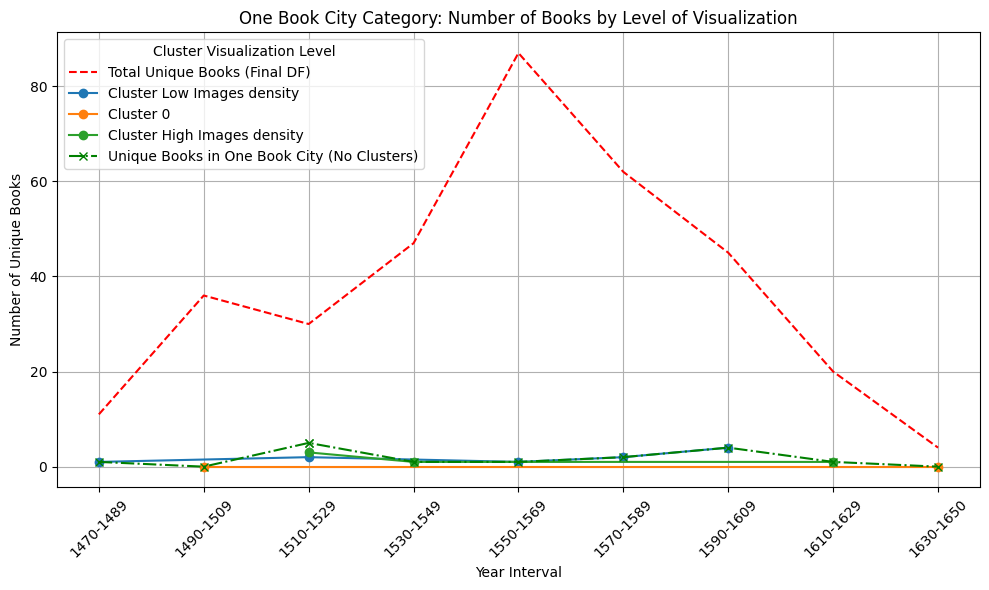

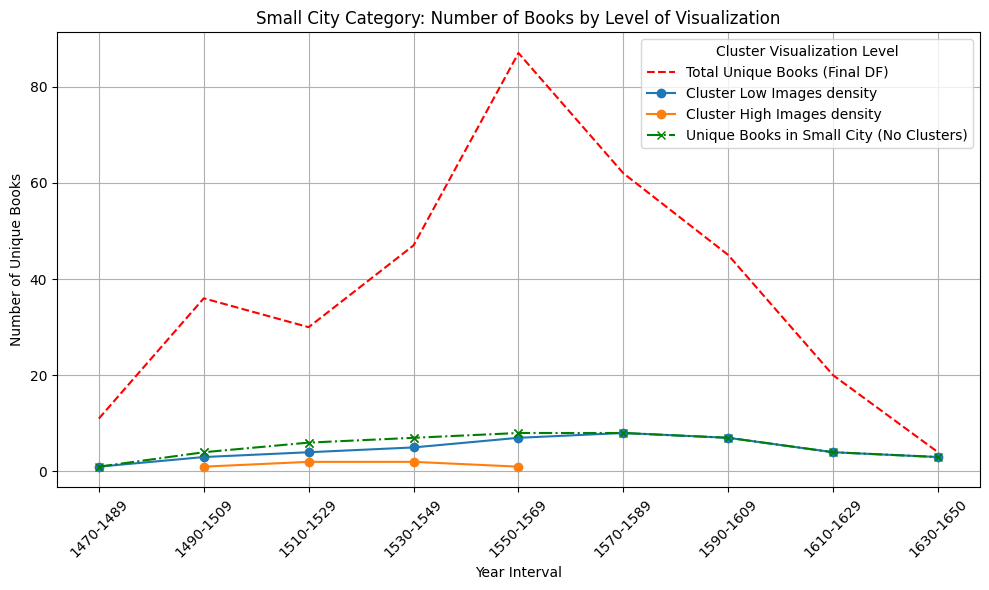

In [45]:
# Define the fixed time intervals
time_intervals = [(1470, 1489), (1490, 1509), (1510, 1529), (1530, 1549), 
                  (1550, 1569), (1570, 1589), (1590, 1609), (1610, 1629), (1630, 1650)]

# Create a function to assign the year to its respective time interval
def get_time_interval(year):
    for start, end in time_intervals:
        if start <= year <= end:
            return f"{start}-{end}"
    return None  # In case the year doesn't fall into any of the intervals

# Apply the function to assign the time intervals
final_df['year_interval'] = final_df['year'].apply(get_time_interval)

# 1. Calculate total unique books in the entire dataset per year interval (the same for all graphs)
total_unique_books = final_df.groupby('year_interval')['book'].nunique().reset_index()
total_unique_books.rename(columns={'book': 'total_unique_books'}, inplace=True)

# 2. Loop through each place_category and plot the data
place_categories = final_df['place_category'].unique()

for place in place_categories:
    # Filter the data for the current place_category
    place_data = final_df[final_df['place_category'] == place]
    
    # Calculate unique books per cluster_visualization_level within the current place_category
    unique_books_per_cluster = place_data.groupby(
        ['year_interval', 'cluster'])['book'].nunique().reset_index()
    unique_books_per_cluster.rename(columns={'book': 'unique_books_per_cluster'}, inplace=True)
    
    # Calculate unique books for the place_category without separating by cluster_visualization_level
    unique_books_for_place = place_data.groupby('year_interval')['book'].nunique().reset_index()
    unique_books_for_place.rename(columns={'book': 'unique_books_for_place_category'}, inplace=True)
    
    # Merge the total unique books with the current place's data
    place_data_merged = pd.merge(unique_books_per_cluster, total_unique_books, on='year_interval', how='left')
    place_data_merged_full = pd.merge(place_data_merged, unique_books_for_place, on='year_interval', how='left')

    # Ensure all year intervals (1470-1650) are included, even those with no books (fill missing with 0)
    all_years = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650']
    all_intervals = pd.DataFrame({'year_interval': all_years})

    # Merge the total books with the complete set of intervals for the place category
    place_data_merged_full = pd.merge(all_intervals, place_data_merged_full, on='year_interval', how='left').fillna(0)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot the total unique books (across all data) as a reference line (this should be consistent across all graphs)
    plt.plot(total_unique_books['year_interval'], total_unique_books['total_unique_books'], label="Total Unique Books (Final DF)", color='r', linestyle='--')

    # Plot the unique books for each cluster_visualization_level for the current place
    cluster_levels = place_data_merged_full['cluster'].unique()
    for level in cluster_levels:
        level_data = place_data_merged_full[place_data_merged_full['cluster'] == level]
        plt.plot(level_data['year_interval'], level_data['unique_books_per_cluster'], label=f"Cluster {level}", marker='o')

    # Plot the unique books for the place_category (without separating by clusters)
    plt.plot(place_data_merged_full['year_interval'], place_data_merged_full['unique_books_for_place_category'], label=f"Unique Books in {place} (No Clusters)", color='g', linestyle='-.', marker='x')

    # Customize the plot
    plt.title(f"{place} Category: Number of Books by Level of Visualization")
    plt.xlabel('Year Interval')
    plt.ylabel('Number of Unique Books')
    plt.xticks(rotation=45)
    plt.legend(title="Cluster Visualization Level")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [46]:
# Print unique values in the 'cluster' column of the final_df
unique_clusters = final_df['cluster'].unique()
print(unique_clusters)


['Low Images density' 'High Images density' 'Medium Images density']


C:\Users\nogas\AppData\Local\Temp\ipykernel_4724\2410002098.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = final_df.groupby('year_range').agg(


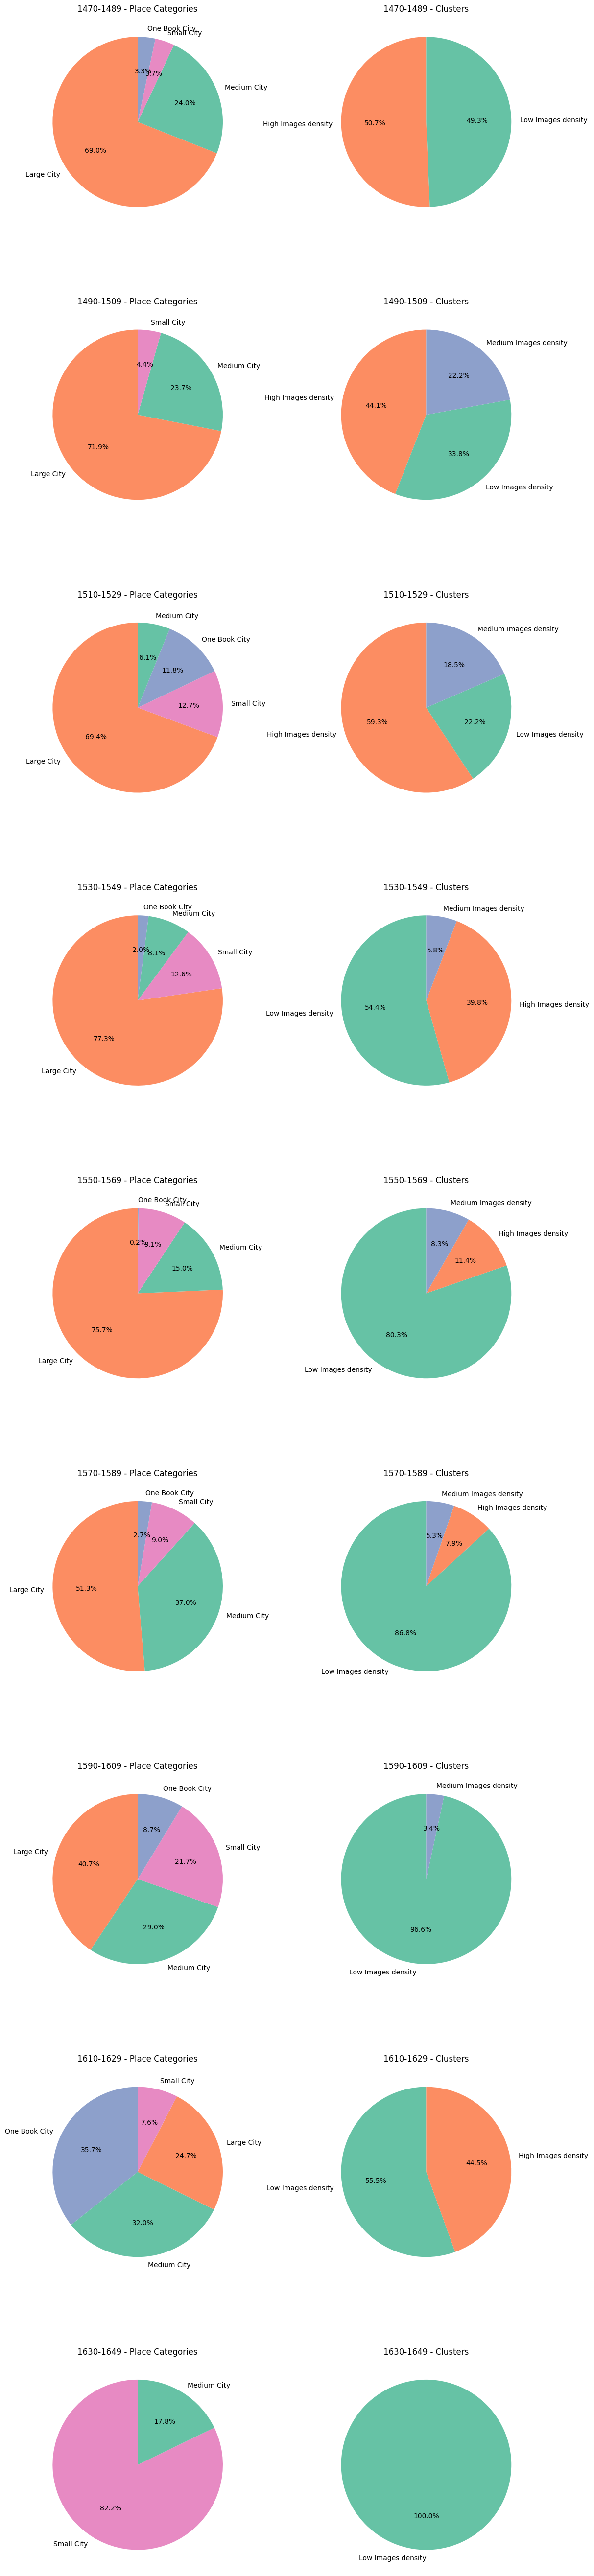

In [47]:
# Assuming final_df is already defined and the 'year' column is in final_df
# Step 1: Convert 'year' to integer
final_df['year'] = final_df['year'].astype(int)

# Step 2: Create year bins for every 20 years
bins = list(range(1470, 1651, 20))
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
final_df['year_range'] = pd.cut(final_df['year'], bins=bins, labels=labels, right=False)

# Step 3: Get unique categories in 'place_category' and 'cluster'
unique_place_categories = final_df['place_category'].unique()
unique_clusters = final_df['cluster'].unique()

# Step 4: Create consistent color palette for each category
# Using seaborn to generate a color palette, each category will get a specific color
place_category_colors = dict(zip(unique_place_categories, sns.color_palette("Set2", len(unique_place_categories))))
cluster_colors = dict(zip(unique_clusters, sns.color_palette("Set2", len(unique_clusters))))

# Step 5: Group the data by year range and calculate unique values for place_category and cluster
grouped = final_df.groupby('year_range').agg(
    unique_places=('place_category', 'nunique'),
    unique_clusters=('cluster', 'nunique')
)

# Step 6: Plot the pie charts for each year range
fig, axes = plt.subplots(len(grouped), 2, figsize=(12, len(grouped)*6))

for i, (year_range, row) in enumerate(grouped.iterrows()):
    # Data for pie chart of unique place categories
    place_categories = final_df[final_df['year_range'] == year_range]['place_category'].value_counts()
    
    # Data for pie chart of unique clusters
    clusters = final_df[final_df['year_range'] == year_range]['cluster'].value_counts()
    
    # Plot place category pie chart with consistent colors
    axes[i, 0].pie(place_categories, labels=place_categories.index, autopct='%1.1f%%', 
                   startangle=90, colors=[place_category_colors[category] for category in place_categories.index])
    axes[i, 0].set_title(f'{year_range} - Place Categories')
    
    # Plot cluster pie chart with consistent colors
    axes[i, 1].pie(clusters, labels=clusters.index, autopct='%1.1f%%', 
                   startangle=90, colors=[cluster_colors[category] for category in clusters.index])
    axes[i, 1].set_title(f'{year_range} - Clusters')

plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_4724\806477714.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_category_counts = final_df.groupby(['year_range', 'place_category'])['book'].nunique().unstack(fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4724\806477714.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_counts = final_df.groupby(['year_range', 'cluster'])['book'].nunique().unstack(fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4724\806477714.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of 

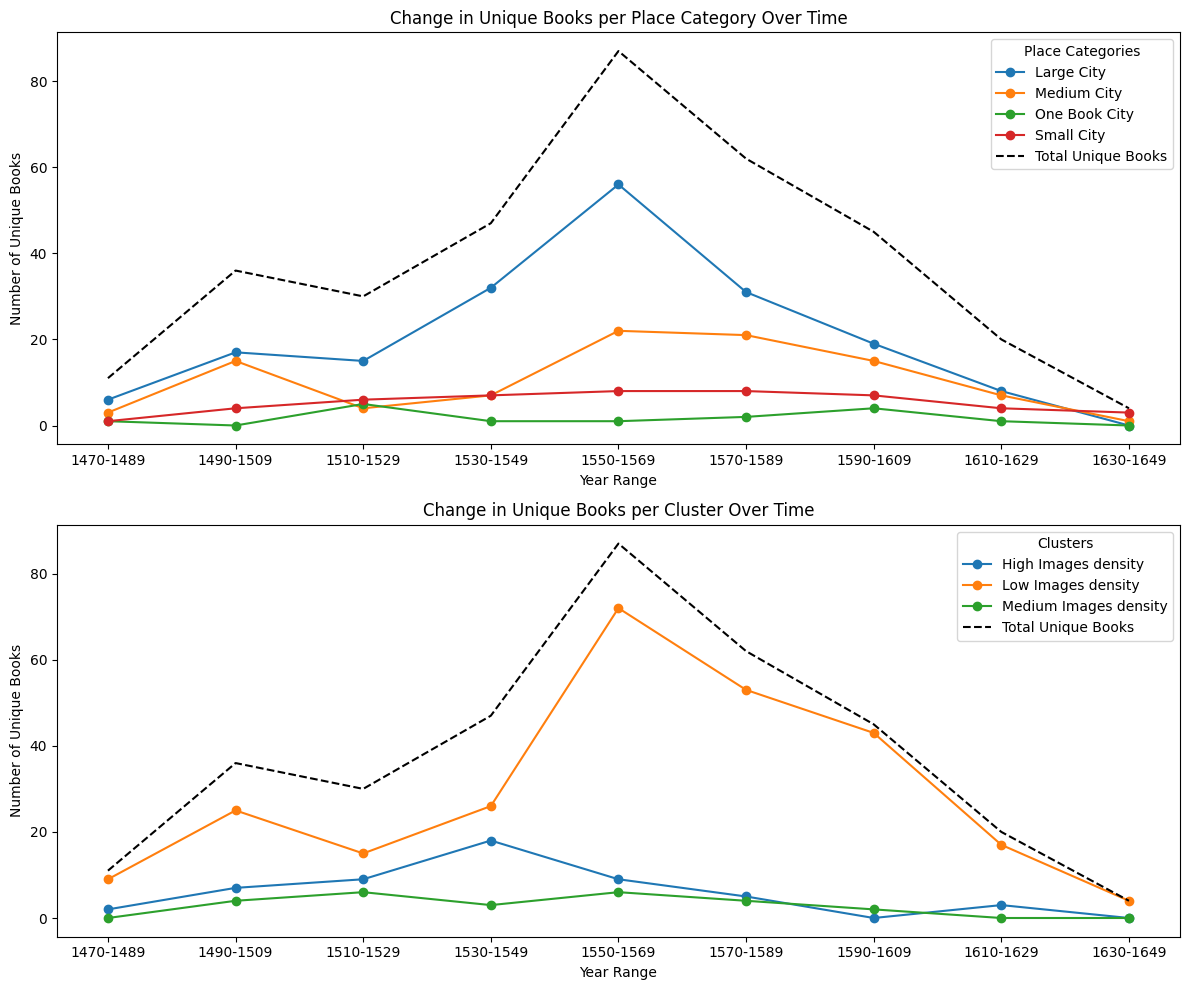

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_df is already defined and the 'year' column is in final_df
# Step 1: Convert 'year' to integer
final_df['year'] = final_df['year'].astype(int)

# Step 2: Create year bins for every 20 years
bins = list(range(1470, 1651, 20))
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
final_df['year_range'] = pd.cut(final_df['year'], bins=bins, labels=labels, right=False)

# Step 3: Group by year range and count unique books for each place_category and cluster
place_category_counts = final_df.groupby(['year_range', 'place_category'])['book'].nunique().unstack(fill_value=0)
cluster_counts = final_df.groupby(['year_range', 'cluster'])['book'].nunique().unstack(fill_value=0)

# Step 4: Calculate the total number of unique books per year range
total_unique_books = final_df.groupby('year_range')['book'].nunique()

# Step 5: Plot the line graphs for place categories and clusters
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for place_category
place_category_counts.plot(ax=axes[0], marker='o', linestyle='-', title='Change in Unique Books per Place Category Over Time')
axes[0].plot(total_unique_books.index, total_unique_books, 'k--', label='Total Unique Books')  # Black broken line
axes[0].set_xlabel('Year Range')
axes[0].set_ylabel('Number of Unique Books')
axes[0].legend(title='Place Categories')

# Plot for cluster
cluster_counts.plot(ax=axes[1], marker='o', linestyle='-', title='Change in Unique Books per Cluster Over Time')
axes[1].plot(total_unique_books.index, total_unique_books, 'k--', label='Total Unique Books')  # Black broken line
axes[1].set_xlabel('Year Range')
axes[1].set_ylabel('Number of Unique Books')
axes[1].legend(title='Clusters')

plt.tight_layout()
plt.show()


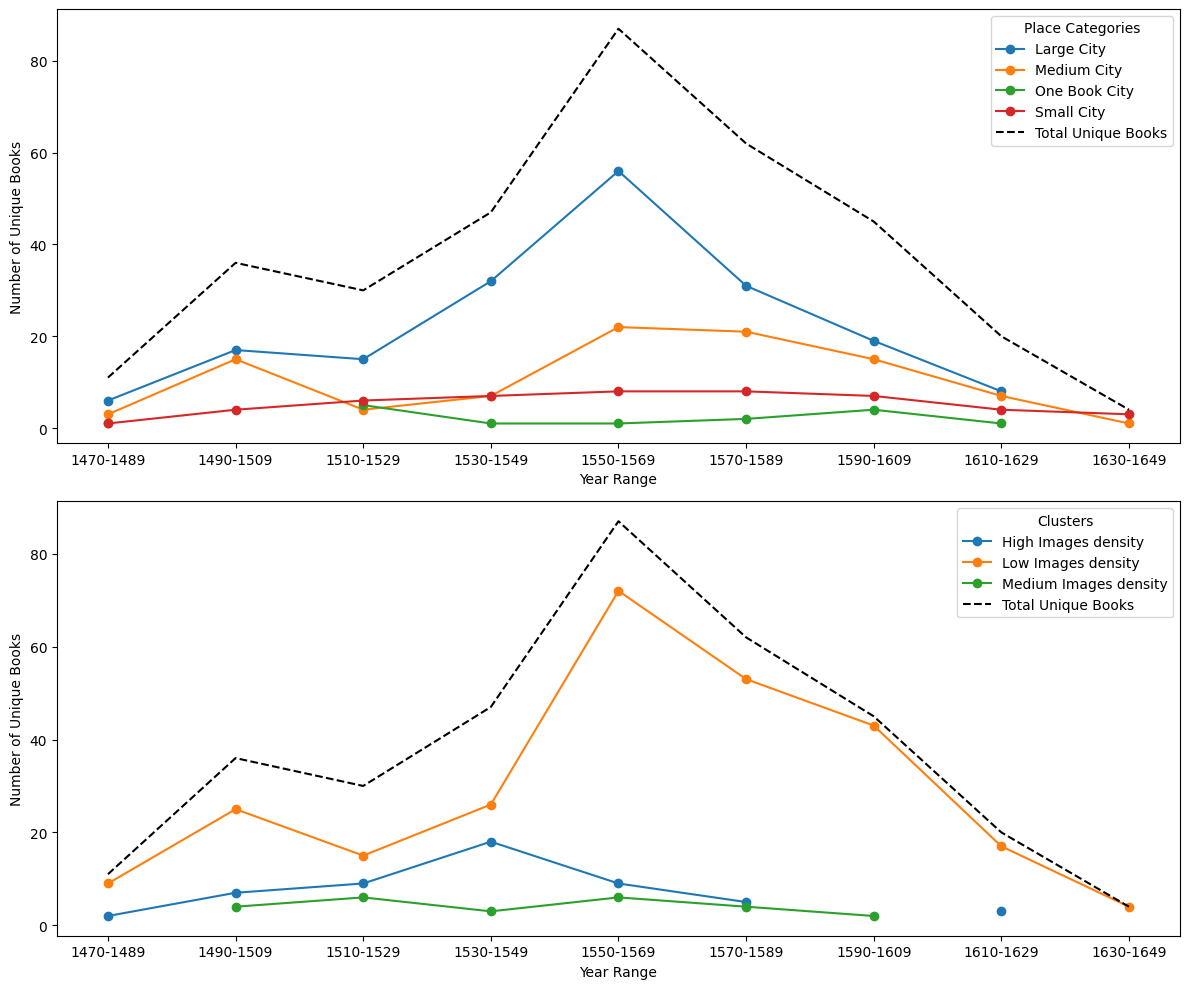

In [49]:
# Step 3: Group by year range and count unique books for each place_category and cluster
place_category_counts = final_df.groupby(['year_range', 'place_category'], observed=True)['book'].nunique().unstack(fill_value=0)
cluster_counts = final_df.groupby(['year_range', 'cluster'], observed=True)['book'].nunique().unstack(fill_value=0)

# Step 4: Calculate the total number of unique books per year range
total_unique_books = final_df.groupby('year_range', observed=True)['book'].nunique()

# Step 5: Filter out rows where the value is zero for both place_category_counts and cluster_counts
place_category_counts_non_zero = place_category_counts[place_category_counts > 0]
cluster_counts_non_zero = cluster_counts[cluster_counts > 0]

# Step 6: Plot the line graphs for place categories and clusters
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot for place_category (only showing dots for non-zero values)
for category in place_category_counts_non_zero.columns:
    axes[0].plot(place_category_counts_non_zero.index, place_category_counts_non_zero[category], marker='o', linestyle='-', label=category)
axes[0].plot(total_unique_books.index, total_unique_books, 'k--', label='Total Unique Books')  # Black broken line
axes[0].set_xlabel('Year Range')
axes[0].set_ylabel('Number of Unique Books')
axes[0].legend(title='Place Categories')

# Plot for cluster (only showing dots for non-zero values)
for category in cluster_counts_non_zero.columns:
    axes[1].plot(cluster_counts_non_zero.index, cluster_counts_non_zero[category], marker='o', linestyle='-', label=category)
axes[1].plot(total_unique_books.index, total_unique_books, 'k--', label='Total Unique Books')  # Black broken line
axes[1].set_xlabel('Year Range')
axes[1].set_ylabel('Number of Unique Books')
axes[1].legend(title='Clusters')

plt.tight_layout()
plt.show()


In [50]:
final_df

book  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/016...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/237...   

                                                  images  year       place  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1489     Leipzig   
...                                                  ...   ...         ...   
20949  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20950  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20951  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20952  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   
20953  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  1576  Wittenberg   

       num_pages  num_images_per_page             cluster place_category  \
0             65             0.369231  Low Images density    Medium City   
1             65             0.369231  Low Images density    Medium City   
2             65             0.369231  Low Images density    Medium City   
3             65             0.369231  Low Images density    Medium City   
4             65             0.369231  Low Images density    Medium City   
...          ...                  ...                 ...            ...   
20949        257             0.108949  Low Images density     Large City   
20950        257             0.108949  Low Images density     Large City   
20951        257             0.108949  Low Images density     Large City   
20952        257             0.108949  Low Images density     Large City   
20953        257             0.108949  Low Images density     Large City   

      year_interval year_range  
0         1470-1489  1470-1489  
1         1470-1489  1470-1489  
2         1470-1489  1470-1489  
3         1470-1489  1470-1489  
4         1470-1489  1470-1489  
...             ...        ...  
20949     1570-1589  1570-1589  
20950     1570-1589  1570-1589  
20951     1570-1589  1570-1589  
20952     1570-1589  1570-1589  
20953     1570-1589  1570-1589  

[20954 rows x 10 columns]

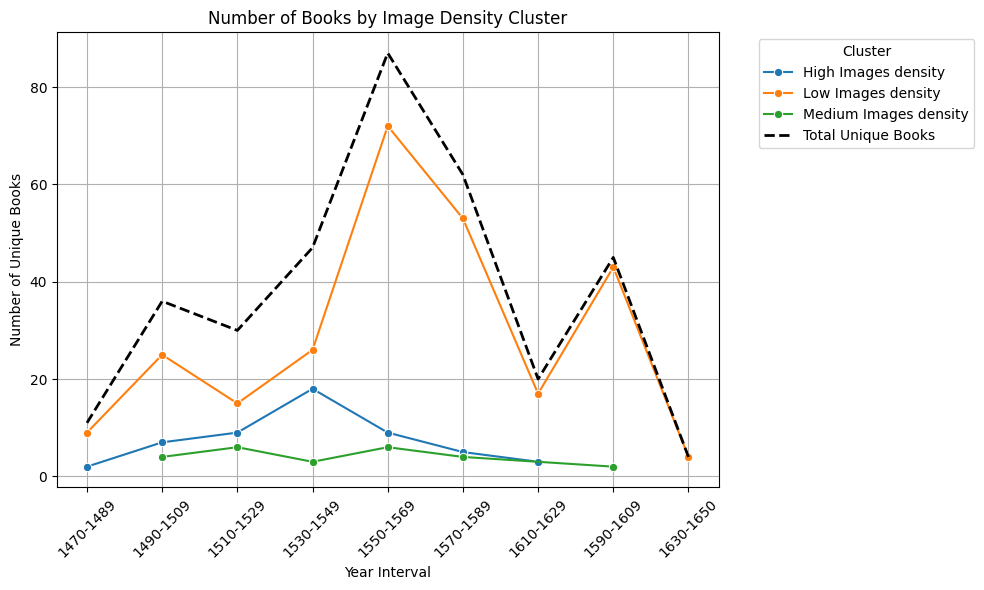

In [56]:
# Assuming final_df is your DataFrame

# Step 1: Grouping by cluster and year_interval, then counting unique 'book' values
grouped = final_df.groupby(['cluster', 'year_interval'])['book'].nunique().reset_index()

# Step 2: Calculate the total number of unique books for each year_interval in final_df
total_unique_books = final_df.groupby('year_interval')['book'].nunique().reset_index()
total_unique_books['cluster'] = 'Total'  # Label the total line for clarity

# Step 3: Create the line plot
plt.figure(figsize=(10, 6))

# Plot for clusters
sns.lineplot(data=grouped, x='year_interval', y='book', hue='cluster', marker='o')

# Plot the broken black line for the total number of unique books
sns.lineplot(data=total_unique_books, x='year_interval', y='book', color='black', linestyle='--', label='Total Unique Books', linewidth=2)

# Step 4: Customize the plot
plt.title('Number of Books by Image Density Cluster')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Books')

# Add grid for better readability
plt.grid(True)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend and layout
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [183]:
# Step 1: Create year bins for every 20 years
bins = list(range(1470, 1651, 20))  # Bin edges
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]  # Create labels for bins

# Step 2: Add the 'year_range' column to the DataFrame
final_df['year_range'] = pd.cut(final_df['year'], bins=bins, labels=labels, right=False)

# Step 3: Count the number of unique images per place_category per year_range
unique_images_per_place_category = final_df.groupby(['year_range', 'place_category'])['images'].nunique().unstack(fill_value=0)

# Step 4: Display the result
print(unique_images_per_place_category)


place_category  Large City  Medium City  One Book City  Small City
year_range                                                        
1470-1489              207           72             10          11
1490-1509             1152          407              0          76
1510-1529             1163          107            187         222
1530-1549             1958          202             51         320
1550-1569             3688          731              8         447
1570-1589             2399         1740            126         424
1590-1609             1415          974            304         687
1610-1629              353          427            461         110
1630-1649                0           18              0          83


C:\Users\nogas\AppData\Local\Temp\ipykernel_23716\682204414.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_place_category = final_df.groupby(['year_range', 'place_category'])['images'].nunique().unstack(fill_value=0)


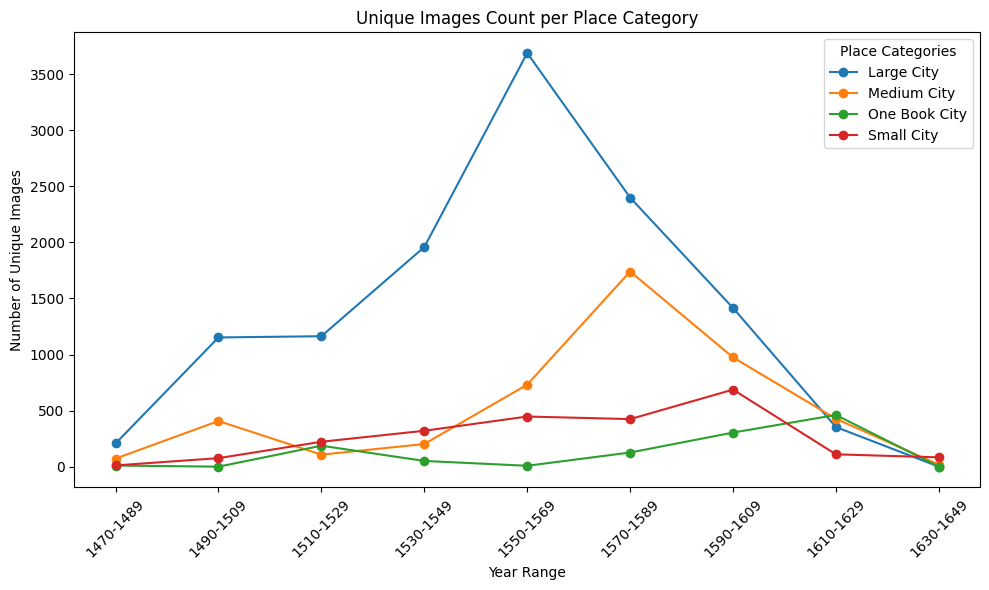

In [184]:
# Step 5: Plot the data
plt.figure(figsize=(10, 6))

# Iterate over each place category and plot the data
for place_category in unique_images_per_place_category.columns:
    plt.plot(unique_images_per_place_category.index, 
             unique_images_per_place_category[place_category], 
             marker='o', linestyle='-', label=place_category)

# Add labels and title
plt.xlabel('Year Range')
plt.ylabel('Number of Unique Images')
plt.title('Unique Images Count per Place Category')

# Show legend
plt.legend(title='Place Categories')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_23716\932804523.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_year_range = books.groupby('year_range')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_23716\932804523.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_year_range = df.groupby('year_range')['images'].nunique()


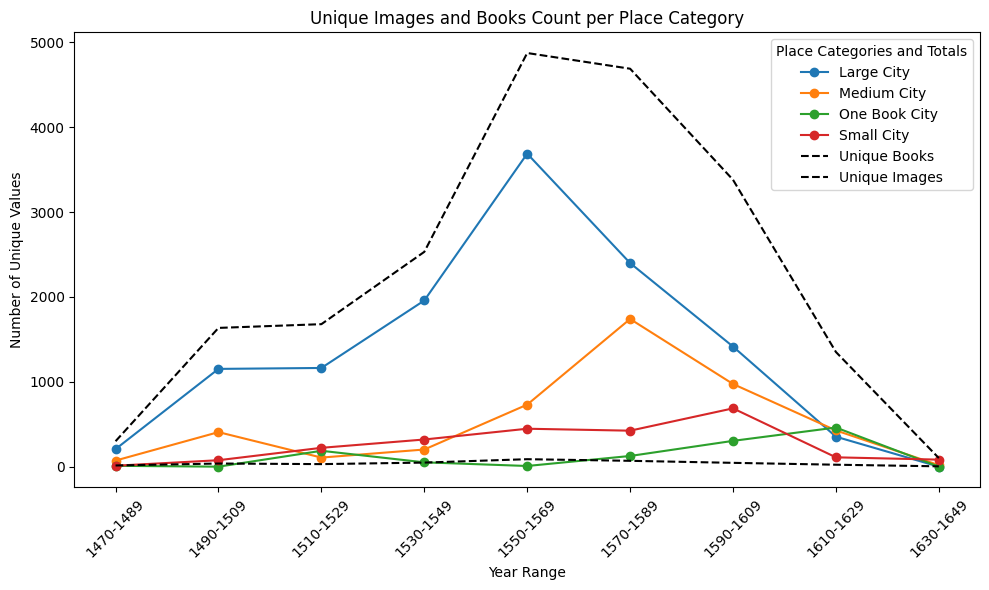

In [187]:

# Calculate the number of unique books per year range (from the 'books' DataFrame)

unique_books_per_year_range = books.groupby('year_range')['book'].nunique()

# Calculate the number of unique images per year range (from the 'df' DataFrame)

unique_images_per_year_range = df.groupby('year_range')['images'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot for each place category
for place_category in unique_images_per_place_category.columns:
    plt.plot(unique_images_per_place_category.index, 
             unique_images_per_place_category[place_category], 
             marker='o', linestyle='-', label=place_category)

# Plot the total number of unique books as a dashed black line
plt.plot(unique_books_per_year_range.index, unique_books_per_year_range, 'k--', label='Unique Books')

# Plot the total number of unique images as a dashed black line
plt.plot(unique_images_per_year_range.index, unique_images_per_year_range, 'k--', label='Unique Images')

# Add labels and title
plt.xlabel('Year Range')
plt.ylabel('Number of Unique Values')
plt.title('Unique Images and Books Count per Place Category')

# Show legend
plt.legend(title='Place Categories and Totals')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [186]:
books

book  \
0    http://sphaera.mpiwg-berlin.mpg.de/id/item/216...   
1    http://sphaera.mpiwg-berlin.mpg.de/id/item/308...   
2    http://sphaera.mpiwg-berlin.mpg.de/id/item/363...   
3    http://sphaera.mpiwg-berlin.mpg.de/id/item/36a...   
4    http://sphaera.mpiwg-berlin.mpg.de/id/item/389...   
..                                                 ...   
354  http://sphaera.mpiwg-berlin.mpg.de/id/item/889...   
355  http://sphaera.mpiwg-berlin.mpg.de/id/item/b96...   
356  http://sphaera.mpiwg-berlin.mpg.de/id/item/bb6...   
357  http://sphaera.mpiwg-berlin.mpg.de/id/item/c55...   
358  http://sphaera.mpiwg-berlin.mpg.de/id/item/c5a...   

                                                 label   bid  \
0    Quaestiones in libellum de sphaera Ioannis de ...  2148   
1                        Sphaera Ioannis de Sacrobosco  1716   
2                La sfera di M. Giovanni di Sacrobosco  2215   
3                       Sphaera Ioannis de Sacro Bosco  1953   
4           Iohannis de Sacro Busto libellus de sphæra  1904   
..                                                 ...   ...   
354        De Sphaera et primis astronomiae rudimentis  2176   
355   In Sphaeram Ioannis de Sacro Bosco, Commentarius  1822   
356   In Sphaeram Ioannis de Sacro Bosco, commentarius  2151   
357                    La Sphere de Iean de Sacrobosco  1758   
358        Libellus de Sphaera Iohannis de Sacro Busto  1753   

                                               authors  \
0              Beyer, Hartmann;Sacrobosco, Johannes de   
1                              Sacrobosco, Johannes de   
2          Sacrobosco, Johannes de;Danti, Piervincenzo   
3    Vinet, Élie;Nunes, Pedro;Valeriano, Pierio;Sac...   
4         Sacrobosco, Johannes de;Melanchthon, Philipp   
..                                                 ...   
354                                     Blebel, Thomas   
355         Clavius, Christoph;Sacrobosco, Johannes de   
356         Clavius, Christoph;Sacrobosco, Johannes de   
357                            Sacrobosco, Johannes de   
358       Melanchthon, Philipp;Sacrobosco, Johannes de   

                                         publishers  \
0                                   Braubach, Peter   
1                                     Richard, Jean   
2                                   Salviani, Baldo   
3                                Cholinus, Maternus   
4                          Krafft the Elder, Johann   
..                                              ...   
354                               Welack, Matthaeus   
355                                  Rigaud, Pierre   
356                                 Crispin, Samuel   
357  Widow of Guillaume Cavellat (Denise de Marnef)   
358            Company Zacharias Schürer & partners   

                                           printers             place  year  \
0                                   Braubach, Peter  Frankfurt (Main)  1560   
1                                     Richard, Jean           Antwerp  1561   
2                     Rastelli, Giovanni Bernardino           Perugia  1574   
3                                Cholinus, Maternus           Cologne  1566   
4                          Krafft the Elder, Johann        Wittenberg  1563   
..                                              ...               ...   ...   
354                               Welack, Matthaeus        Wittenberg  1588   
355                                  Polère, Amédée              Lyon  1618   
356                                 Crispin, Samuel            Geneva  1607   
357  Widow of Guillaume Cavellat (Denise de Marnef)             Paris  1616   
358                                  Krafft, Johann        Wittenberg  1601   

    num_pages   year_bin year_range  
0         338  1550-1569  1550-1569  
1          80  1550-1569  1550-1569  
2          68  1570-1589  1570-1589  
3         200  1550-1569  1550-1569  
4         276  1550-1569  1550-1569  
..        ...        ...        ...  
354       2

In [189]:
df

images   cluster_name  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00260   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00975   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_01224   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_00435   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  SAC_SIL_02191   
...                                                  ...            ...   
20949  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_01777   
20950  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_03527   
20951  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_01676   
20952  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_03546   
20953  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_01689   

                                                     cks  \
0      CK_Sphericity of the Heavens, CK_Venus Lines a...   
1      CK_Definition of Sphere by Euclid, CK_Introduc...   
2      CK_Definition of Sphere by Euclid, CK_Measurem...   
3                               CK_Geometry for Geometry   
4                         CK_Planets Sizes and Distances   
...                                                  ...   
20949                                      CK_10 Spheres   
20950              CK_Celestial Coordinates, CK_Meridian   
20951                           CK_Elevation of the Pole   
20952                                         CK_Horizon   
20953                                      CK_Five Zones   

                                                    book   bid  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...  1624   
...                                                  ...   ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...  2279   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...  2279   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...  2279   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...  2279   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...  2279   

                                        part_or_adaption  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/part/d90...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/part/d90...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/part/d90...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/part/d90...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/part/1e2...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...   

                                  part_or_adaption_label  \
0                              Introduction by d'Étaples   
1                              Introduction by d'Étaples   
2                              Introduction by d'Étaples   
3                              Introduction by d'Étaples   
4                                   Tractatus de sphaera   
...                                                  ...   
20949   First part of the Sphere treatise of Thomas Hill   
20950  Second part of the Sphere treatise of Thomas Hill   
20951  Second part of the Sphere treatise of Thomas Hill   
20952  Second part of the Sphere treatise of Thomas Hill   
20953  Second part of the Sphere treatise of Thomas Hill   

                   type_label custom_identifier   place  year flag   year_bin  \
0      Content, Original Part               110   Paris  1494  nan  1490-1509   
1      Content, Original Part  

In [190]:
final_df

book  \
0      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...   
1      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...   
2      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...   
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...   
...                                                  ...   
20949  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...   
20950  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...   
20951  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...   
20952  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...   
20953  http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...   

                                                  images  year   place  \
0      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1494   Paris   
1      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1494   Paris   
2      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1494   Paris   
3      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1494   Paris   
4      http://db.sphaera.mpiwg-berlin.mpg.de/containe...  1494   Paris   
...                                                  ...   ...     ...   
20949  http://www.researchspace.org/ontology/ImageReg...  1599  London   
20950  http://www.researchspace.org/ontology/ImageReg...  1599  London   
20951  http://www.researchspace.org/ontology/ImageReg...  1599  London   
20952  http://www.researchspace.org/ontology/ImageReg...  1599  London   
20953  http://www.researchspace.org/ontology/ImageReg...  1599  London   

       num_pages  num_images_per_page                cluster place_category  \
0             49             0.510204    High Images density     Large City   
1             49             0.510204    High Images density     Large City   
2             49             0.510204    High Images density     Large City   
3             49             0.510204    High Images density     Large City   
4             49             0.510204    High Images density     Large City   
...          ...                  ...                    ...            ...   
20949        139             0.352518  Medium Images density    Medium City   
20950        139             0.352518  Medium Images density    Medium City   
20951        139             0.352518  Medium Images density    Medium City   
20952        139             0.352518  Medium Images density    Medium City   
20953        139             0.352518  Medium Images density    Medium City   

      year_interval year_range  
0         1490-1509  1490-1509  
1         1490-1509  1490-1509  
2         1490-1509  1490-1509  
3         1490-1509  1490-1509  
4         1490-1509  1490-1509  
...             ...        ...  
20949     1590-1609  1590-1609  
20950     1590-1609  1590-1609  
20951     1590-1609  1590-1609  
20952     1590-1609  1590-1609  
20953     1590-1609  1590-1609  

[20954 rows x 10 columns]

In [ ]:
# Displaying results as DataFrames
print("Rows with missing 'cluster_visualization_level' (NaN):")
print(missing_levels_df)

print("\nUnique values in 'cluster_visualization_level':")
print(pd.DataFrame(unique_levels, columns=['Unique Levels']))

print("\nRows with unexpected 'cluster_visualization_level' values:")
print(unexpected_levels_df)


C:\Users\nogas\AppData\Local\Temp\ipykernel_20708\1220138621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_cities_df['year_interval'] = (large_cities_df['year'] // 20) * 20


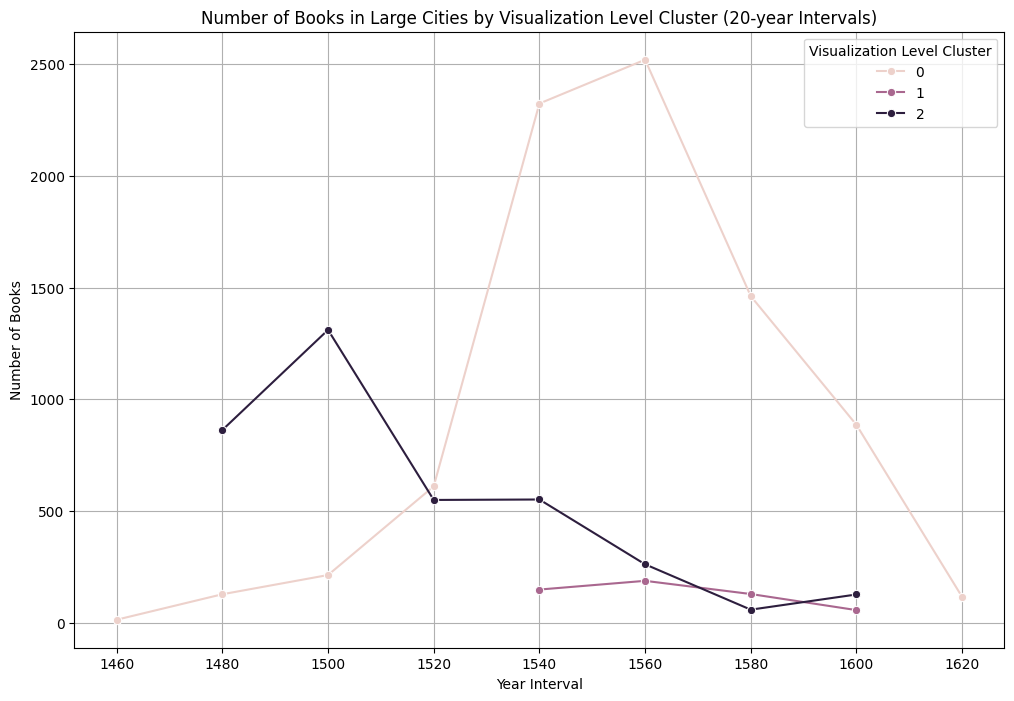

In [134]:
import numpy as np

# Step 1: Create 20-year intervals
large_cities_df['year_interval'] = (large_cities_df['year'] // 20) * 20

# Step 2: Group by 'year_interval' and 'visualization_level_cluster' and count the number of books
grouped_large_cities_interval = large_cities_df.groupby(['year_interval', 'visualization_level_cluster']).size().reset_index(name='book_count')

# Step 3: Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_large_cities_interval, x='year_interval', y='book_count', hue='visualization_level_cluster', marker='o')

# Step 4: Customize the plot
plt.title('Number of Books in Large Cities by Visualization Level Cluster (20-year Intervals)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Books')
plt.legend(title='Visualization Level Cluster')
plt.grid(True)

# Show the plot
plt.show()


In [135]:
# Step 1: Group by 'visualization_level_cluster' and calculate the min and max of 'num_images_per_page' in each cluster
cluster_ranges = final_df.groupby('visualization_level_cluster')['num_images_per_page'].agg(['min', 'max']).reset_index()

# Step 2: Display the result
print(cluster_ranges)


KeyError: 'visualization_level_cluster'

In [ ]:
# Step 1: Filter for Medium Cities only
medium_cities_df = final_df[final_df['place_category'] == 'Medium City']

# Step 2: Create 20-year intervals
medium_cities_df['year_interval'] = (medium_cities_df['year'] // 20) * 20

# Step 3: Group by 'year_interval' and 'visualization_level_cluster' and count the number of books
grouped_medium_cities_interval = medium_cities_df.groupby(['year_interval', 'visualization_level_cluster']).size().reset_index(name='book_count')

# Step 4: Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_medium_cities_interval, x='year_interval', y='book_count', hue='visualization_level_cluster', marker='o')

# Step 5: Customize the plot
plt.title('Number of Books in Medium Cities by Visualization Level Cluster (20-year Intervals)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Books')
plt.legend(title='Visualization Level Cluster')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Step 1: Filter for Small Cities only
small_cities_df = final_df[final_df['place_category'] == 'Small City']

# Step 2: Create 20-year intervals
small_cities_df['year_interval'] = (small_cities_df['year'] // 20) * 20

# Step 3: Group by 'year_interval' and 'visualization_level_cluster' and count the number of books
grouped_small_cities_interval = small_cities_df.groupby(['year_interval', 'visualization_level_cluster']).size().reset_index(name='book_count')

# Step 4: Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_small_cities_interval, x='year_interval', y='book_count', hue='visualization_level_cluster', marker='o')

# Step 5: Customize the plot
plt.title('Number of Books in Small Cities by Visualization Level Cluster (20-year Intervals)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Books')
plt.legend(title='Visualization Level Cluster')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Step 1: Filter for One Book Cities only
one_book_cities_df = final_df[final_df['place_category'] == 'One Book City']

# Step 2: Create 20-year intervals
one_book_cities_df['year_interval'] = (one_book_cities_df['year'] // 20) * 20

# Step 3: Group by 'year_interval' and 'visualization_level_cluster' and count the number of books
grouped_one_book_cities_interval = one_book_cities_df.groupby(['year_interval', 'visualization_level_cluster']).size().reset_index(name='book_count')

# Step 4: Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_one_book_cities_interval, x='year_interval', y='book_count', hue='visualization_level_cluster', marker='o')

# Step 5: Customize the plot
plt.title('Number of Books in One Book Cities by Visualization Level Cluster (20-year Intervals)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Books')
plt.legend(title='Visualization Level Cluster')
plt.grid(True)

# Show the plot
plt.show()


In [16]:
import pandas as pd

# Categories of cities (as you've defined earlier)
categories = {
    'Large Printing Centers': ['Venice', 'Paris', 'Wittenberg'],
    'Medium Printing Centers': ['Antwerp', 'Leipzig', 'Frankfurt (Main)', 'Lyon', 'Cologne', 'London'],
    'Small Printing Centers': ['Rome', 'Strasbourg', 'Seville', 'Leiden', 'Milan', 'Saint Gervais', 'Florence', 
                               'Kraków', 'Salamanca', 'Lisbon', 'Bologna', 'Madrid', 'Sine loco', 'Basel', 'Lemgo', 
                               'Dijon', 'Valladolid', 'Perugia'],
    'One Book Cities': ['Siena', 'Avignon', 'Vienna', 'Ferrara', 'Padua', 'Nuremberg', 'Neustadt an der Weinstraße', 
                        'Mexico City', 'Coimbra', 'Leuven', 'Ingolstadt', 'Heidelberg', 'Geneva', 'Dillingen an der Donau', 
                        'Alcalá de Henares', 'Geneva']
}

# Data for unique books and images per city (use your actual 'df' data here)
place_stats_sorted = pd.DataFrame({
    'place': ['Venice', 'Paris', 'Wittenberg', 'Lyon', 'Antwerp', 'Cologne', 'Rome', 'Leipzig', 'Mainz', 
              'Saint Gervais', 'London', 'Basel', 'Seville', 'Lisbon', 'Milan', 'Leiden', 'Florence', 'Heidelberg', 
              'Geneva', 'Strasbourg', 'Frankfurt (Main)', 'Valladolid', 'Neustadt an der Weinstraße', 'Coimbra', 
              'Kraków', 'Siena', 'Vienna', 'Leuven', 'Ingolstadt', 'Sine loco', 'Avignon', 'Perugia', 'Madrid', 
              'Salamanca', 'Alcalá de Henares', 'Nuremberg', 'Dijon', 'Lemgo', 'Bologna', 'Ferrara', 'Padua', 
              'Mexico City'],
    'unique_books': [68, 68, 48, 16, 22, 15, 6, 19, 1, 3, 10, 2, 5, 3, 2, 4, 3, 1, 1, 5, 13, 2, 1, 1, 1, 2, 1, 1, 2, 2, 
                     1, 1, 1, 1, 1, 2, 1, 1],
    'images_per_book': [92.426471, 48.985294, 56.645833, 135.937500, 41.409091, 50.533333, 111.500000, 26.631579, 
                        461.000000, 106.333333, 25.700000, 104.000000, 40.600000, 49.000000, 72.500000, 36.000000, 
                        36.000000, 45.333333, 124.000000, 124.000000, 18.400000, 5.461538, 34.000000, 64.000000, 
                        62.000000, 18.666667, 54.000000, 53.000000, 51.000000, 43.000000, 21.000000, 39.000000, 
                        38.000000, 36.000000, 28.000000, 27.000000, 25.000000, 10.500000, 17.000000, 11.000000, 
                        10.000000, 8.000000, 2.000000]
})

# Now, let's calculate the average number of images per book for each category
category_avg_images = []

for category, cities in categories.items():
    category_data = place_stats_sorted[place_stats_sorted['place'].isin(cities)]
    avg_images_per_book = category_data['images_per_book'].mean()  # Calculate the average images per book
    category_avg_images.append([category, avg_images_per_book])

# Convert this into a DataFrame
category_avg_df = pd.DataFrame(category_avg_images, columns=['Category', 'Average Images per Book'])

# Display the resulting DataFrame
print(category_avg_df)


ValueError: All arrays must be of the same length

In [147]:
import pandas as pd

# Data for cities, unique books, and images per book
place = ['Venice', 'Paris', 'Wittenberg', 'Lyon', 'Antwerp', 'Cologne', 'Rome', 'Leipzig', 'Mainz', 
         'Saint Gervais', 'London', 'Basel', 'Seville', 'Lisbon', 'Milan', 'Leiden', 'Florence', 'Heidelberg', 
         'Geneva', 'Strasbourg', 'Frankfurt (Main)', 'Valladolid', 'Neustadt an der Weinstraße', 'Coimbra', 
         'Kraków', 'Siena', 'Vienna', 'Leuven', 'Ingolstadt', 'Sine loco', 'Avignon', 'Perugia', 'Madrid', 
         'Salamanca', 'Alcalá de Henares', 'Nuremberg', 'Dijon', 'Lemgo', 'Bologna', 'Ferrara', 'Padua', 
         'Mexico City']
unique_books = [68, 68, 48, 16, 22, 15, 6, 19, 1, 3, 10, 2, 5, 3, 2, 4, 3, 1, 1, 5, 13, 2, 1, 1, 1, 2, 1, 1, 2, 2, 
                1, 1, 1, 1, 1, 2, 1, 1]
images_per_book = [92.426471, 48.985294, 56.645833, 135.937500, 41.409091, 50.533333, 111.500000, 26.631579, 
                   461.000000, 106.333333, 25.700000, 104.000000, 40.600000, 49.000000, 72.500000, 36.000000, 
                   36.000000, 45.333333, 124.000000, 124.000000, 18.400000, 5.461538, 34.000000, 64.000000, 
                   62.000000, 18.666667, 54.000000, 53.000000, 51.000000, 43.000000, 21.000000, 39.000000, 
                   38.000000, 36.000000, 28.000000, 27.000000, 25.000000, 10.500000, 17.000000, 11.000000, 
                   10.000000, 8.000000, 2.000000]

# Check the lengths of the lists to ensure they are all the same length
len_place = len(place)
len_unique_books = len(unique_books)
len_images_per_book = len(images_per_book)

print(f"Length of place list: {len_place}")
print(f"Length of unique_books list: {len_unique_books}")
print(f"Length of images_per_book list: {len_images_per_book}")


Length of place list: 42
Length of unique_books list: 38
Length of images_per_book list: 43


In [105]:
import pandas as pd

# Data for cities and their respective number of images
data = {
    'place': ['Venice', 'Paris', 'Wittenberg', 'Lyon', 'Antwerp', 'Cologne', 'Rome', 'Leipzig', 'Mainz', 
              'Saint Gervais', 'London', 'Basel', 'Seville', 'Lisbon', 'Milan', 'Leiden', 'Florence', 
              'Heidelberg', 'Geneva', 'Strasbourg', 'Frankfurt (Main)', 'Valladolid', 'Neustadt an der Weinstraße', 
              'Coimbra', 'Kraków', 'Siena', 'Vienna', 'Leuven', 'Ingolstadt', 'Sine loco', 'Avignon', 
              'Perugia', 'Madrid', 'Salamanca', 'Alcalá de Henares', 'Nuremberg', 'Dijon', 'Lemgo', 'Bologna', 
              'Ferrara', 'Padua', 'Mexico City'],
    'images': [6285, 3331, 2719, 2175, 911, 758, 669, 506, 461, 319, 257, 208, 203, 147, 145, 144, 136, 
               124, 124, 92, 71, 68, 64, 62, 56, 54, 53, 51, 43, 42, 39, 38, 36, 28, 27, 25, 21, 17, 11, 10, 
               8, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Use quantiles to cluster cities into 4 groups based on the number of images
df['image_group'] = pd.qcut(df['images'], q=4, labels=['Group 1 (Low)', 'Group 2', 'Group 3', 'Group 4 (High)'])

# Show the resulting clusters
print(df[['place', 'images', 'image_group']])


                         place  images     image_group
0                       Venice    6285  Group 4 (High)
1                        Paris    3331  Group 4 (High)
2                   Wittenberg    2719  Group 4 (High)
3                         Lyon    2175  Group 4 (High)
4                      Antwerp     911  Group 4 (High)
5                      Cologne     758  Group 4 (High)
6                         Rome     669  Group 4 (High)
7                      Leipzig     506  Group 4 (High)
8                        Mainz     461  Group 4 (High)
9                Saint Gervais     319  Group 4 (High)
10                      London     257  Group 4 (High)
11                       Basel     208         Group 3
12                     Seville     203         Group 3
13                      Lisbon     147         Group 3
14                       Milan     145         Group 3
15                      Leiden     144         Group 3
16                    Florence     136         Group 3
17        

In [106]:
import pandas as pd

# Data for cities and their respective number of images
data = {
    'place': ['Venice', 'Paris', 'Wittenberg', 'Lyon', 'Antwerp', 'Cologne', 'Rome', 'Leipzig', 'Mainz', 
              'Saint Gervais', 'London', 'Basel', 'Seville', 'Lisbon', 'Milan', 'Leiden', 'Florence', 
              'Heidelberg', 'Geneva', 'Strasbourg', 'Frankfurt (Main)', 'Valladolid', 'Neustadt an der Weinstraße', 
              'Coimbra', 'Kraków', 'Siena', 'Vienna', 'Leuven', 'Ingolstadt', 'Sine loco', 'Avignon', 
              'Perugia', 'Madrid', 'Salamanca', 'Alcalá de Henares', 'Nuremberg', 'Dijon', 'Lemgo', 'Bologna', 
              'Ferrara', 'Padua', 'Mexico City'],
    'images': [6285, 3331, 2719, 2175, 911, 758, 669, 506, 461, 319, 257, 208, 203, 147, 145, 144, 136, 
               124, 124, 92, 71, 68, 64, 62, 56, 54, 53, 51, 43, 42, 39, 38, 36, 28, 27, 25, 21, 17, 11, 10, 
               8, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Use quantiles to cluster cities into 4 groups based on the number of images
df['image_group'] = pd.qcut(df['images'], q=4, labels=['Group 1 (Low)', 'Group 2', 'Group 3', 'Group 4 (High)'])

# Create a list to store the output
clusters = []

# Iterate over each cluster group
for group in df['image_group'].unique():
    # Get the subset of cities for each group
    group_df = df[df['image_group'] == group]
    
    # Get the range of images for this group
    min_images = group_df['images'].min()
    max_images = group_df['images'].max()
    range_str = f"{min_images}-{max_images}"
    
    # Get the list of cities and their image counts
    cities_list = ", ".join([f"{row['place']} ({row['images']})" for _, row in group_df.iterrows()])
    
    # Append the cluster data
    clusters.append([group, range_str, cities_list])

# Create a DataFrame for the clusters table
clusters_df = pd.DataFrame(clusters, columns=['Cluster Name', 'Range of Number of Images', 'Names of Cities (with Image Counts)'])

# Display the table
print(clusters_df)


     Cluster Name Range of Number of Images  \
0  Group 4 (High)                  257-6285   
1         Group 3                    71-208   
2         Group 2                     39-68   
3   Group 1 (Low)                      2-38   

                 Names of Cities (with Image Counts)  
0  Venice (6285), Paris (3331), Wittenberg (2719)...  
1  Basel (208), Seville (203), Lisbon (147), Mila...  
2  Valladolid (68), Neustadt an der Weinstraße (6...  
3  Perugia (38), Madrid (36), Salamanca (28), Alc...  


In [107]:
import pandas as pd

# Data for cities and their respective number of images
data = {
    'place': ['Venice', 'Paris', 'Wittenberg', 'Lyon', 'Antwerp', 'Cologne', 'Rome', 'Leipzig', 'Mainz', 
              'Saint Gervais', 'London', 'Basel', 'Seville', 'Lisbon', 'Milan', 'Leiden', 'Florence', 
              'Heidelberg', 'Geneva', 'Strasbourg', 'Frankfurt (Main)', 'Valladolid', 'Neustadt an der Weinstraße', 
              'Coimbra', 'Kraków', 'Siena', 'Vienna', 'Leuven', 'Ingolstadt', 'Sine loco', 'Avignon', 
              'Perugia', 'Madrid', 'Salamanca', 'Alcalá de Henares', 'Nuremberg', 'Dijon', 'Lemgo', 'Bologna', 
              'Ferrara', 'Padua', 'Mexico City'],
    'images': [6285, 3331, 2719, 2175, 911, 758, 669, 506, 461, 319, 257, 208, 203, 147, 145, 144, 136, 
               124, 124, 92, 71, 68, 64, 62, 56, 54, 53, 51, 43, 42, 39, 38, 36, 28, 27, 25, 21, 17, 11, 10, 
               8, 2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Use quantiles to cluster cities into 4 groups based on the number of images
df['image_group'] = pd.qcut(df['images'], q=4, labels=['Group 1 (Low)', 'Group 2', 'Group 3', 'Group 4 (High)'])

# Create a list to store the output
clusters = []

# Iterate over each cluster group
for group in df['image_group'].unique():
    # Get the subset of cities for each group
    group_df = df[df['image_group'] == group]
    
    # Get the range of images for this group
    min_images = group_df['images'].min()
    max_images = group_df['images'].max()
    range_str = f"{min_images}-{max_images}"
    
    # Get the list of cities and their image counts
    cities_list = ", ".join([f"{row['place']} ({row['images']})" for _, row in group_df.iterrows()])
    
    # Get the number of cities in this group
    num_cities = len(group_df)
    
    # Append the cluster data
    clusters.append([group, range_str, num_cities, cities_list])

# Create a DataFrame for the clusters table
clusters_df = pd.DataFrame(clusters, columns=['Cluster Name', 'Range of Number of Images', 'Number of Cities', 'City Names (with Image Counts)'])

# Display the table
print(clusters_df)


     Cluster Name Range of Number of Images  Number of Cities  \
0  Group 4 (High)                  257-6285                11   
1         Group 3                    71-208                10   
2         Group 2                     39-68                10   
3   Group 1 (Low)                      2-38                11   

                      City Names (with Image Counts)  
0  Venice (6285), Paris (3331), Wittenberg (2719)...  
1  Basel (208), Seville (203), Lisbon (147), Mila...  
2  Valladolid (68), Neustadt an der Weinstraße (6...  
3  Perugia (38), Madrid (36), Salamanca (28), Alc...  


                         place  images
39                      Venice    6285
29                       Paris    3331
41                  Wittenberg    2719
21                        Lyon    2175
1                      Antwerp     911
6                      Cologne     758
31                        Rome     669
16                     Leipzig     506
23                       Mainz     461
32               Saint Gervais     319
20                      London     257
3                        Basel     208
34                     Seville     203
19                      Lisbon     147
25                       Milan     145
15                      Leiden     144
9                     Florence     136
12                  Heidelberg     124
11                      Geneva     124
37                  Strasbourg      92
10            Frankfurt (Main)      71
38                  Valladolid      68
26  Neustadt an der Weinstraße      64
5                      Coimbra      62
14                      K

In [51]:
# Count the number of unique 'image' values associated with each 'place'
place_image_counts = df.groupby('place')['images'].nunique().reset_index()

# Sort the result by the number of unique images in descending order
place_image_counts_sorted = place_image_counts.sort_values(by='images', ascending=False)

# Print the sorted result
print(place_image_counts_sorted)


                         place  images
39                      Venice    6285
29                       Paris    3331
41                  Wittenberg    2719
21                        Lyon    2175
1                      Antwerp     911
6                      Cologne     758
31                        Rome     669
16                     Leipzig     506
23                       Mainz     461
32               Saint Gervais     319
20                      London     257
3                        Basel     208
34                     Seville     203
19                      Lisbon     147
25                       Milan     145
15                      Leiden     144
9                     Florence     136
12                  Heidelberg     124
11                      Geneva     124
37                  Strasbourg      92
10            Frankfurt (Main)      71
38                  Valladolid      68
26  Neustadt an der Weinstraße      64
5                      Coimbra      62
14                      K

In [56]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming the DataFrame is called place_image_counts_sorted and it has columns 'place' and 'images'
# For clustering, we only need the 'images' column

# Reshape the data for clustering (we are clustering based on the 'images' column)
X = place_image_counts_sorted[['images']]

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
place_image_counts_sorted['cluster'] = kmeans.fit_predict(X)

# Group the data by cluster and calculate the min and max number of images for each cluster
cluster_ranges = place_image_counts_sorted.groupby('cluster')['images'].agg(['min', 'max']).reset_index()

# Print the result showing the range of number of images for each cluster
print(cluster_ranges)


   cluster   min   max
0        0     2   911
1        1  2175  3331
2        2  6285  6285


In [57]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming the DataFrame is called place_image_counts_sorted and it has columns 'place' and 'images'
# For clustering, we only need the 'images' column

# Reshape the data for clustering (we are clustering based on the 'images' column)
X = place_image_counts_sorted[['images']]

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
place_image_counts_sorted['cluster'] = kmeans.fit_predict(X)

# Sort the cities by cluster and display the place, images, and cluster information
place_image_counts_sorted_sorted = place_image_counts_sorted.sort_values(by='cluster')

# Print the result showing the place, images, and cluster number
print(place_image_counts_sorted_sorted[['place', 'images', 'cluster']])


                         place  images  cluster
10            Frankfurt (Main)      71        0
4                      Bologna      11        0
18                      Leuven      51        0
13                  Ingolstadt      43        0
36                   Sine loco      42        0
40                      Vienna      53        0
30                     Perugia      38        0
22                      Madrid      36        0
33                   Salamanca      28        0
0            Alcalá de Henares      27        0
27                   Nuremberg      25        0
7                        Dijon      21        0
2                      Avignon      39        0
6                      Cologne     758        0
23                       Mainz     461        0
16                     Leipzig     506        0
31                        Rome     669        0
14                      Kraków      56        0
35                       Siena      54        0
17                       Lemgo      17  

In [58]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming the DataFrame is called place_image_counts_sorted and it has columns 'place' and 'images'
# For clustering, we only need the 'images' column

# Reshape the data for clustering (we are clustering based on the 'images' column)
X = place_image_counts_sorted[['images']]

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
place_image_counts_sorted['cluster'] = kmeans.fit_predict(X)

# Sort the cities by cluster and display the place, images, and cluster information
place_image_counts_sorted_sorted = place_image_counts_sorted.sort_values(by='cluster')

# Print the result showing the place, images, and cluster number
print(place_image_counts_sorted_sorted[['place', 'images', 'cluster']])


                         place  images  cluster
10            Frankfurt (Main)      71        0
2                      Avignon      39        0
7                        Dijon      21        0
27                   Nuremberg      25        0
0            Alcalá de Henares      27        0
33                   Salamanca      28        0
22                      Madrid      36        0
30                     Perugia      38        0
40                      Vienna      53        0
36                   Sine loco      42        0
13                  Ingolstadt      43        0
18                      Leuven      51        0
4                      Bologna      11        0
14                      Kraków      56        0
5                      Coimbra      62        0
17                       Lemgo      17        0
35                       Siena      54        0
8                      Ferrara      10        0
25                       Milan     145        0
11                      Geneva     124  

In [60]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming the DataFrame is called place_image_counts_sorted and it has columns 'place' and 'images'
# For clustering, we only need the 'images' column

# Reshape the data for clustering (we are clustering based on the 'images' column)
X = place_image_counts_sorted[['images']]

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
place_image_counts_sorted['cluster'] = kmeans.fit_predict(X)

# Group the data by cluster and calculate the min, max, and count of places for each cluster
cluster_ranges = place_image_counts_sorted.groupby('cluster')['images'].agg(['min', 'max'])
cluster_ranges['num_places'] = place_image_counts_sorted.groupby('cluster')['place'].transform('count').unique()

# Reset index to make it easier to print
cluster_ranges = cluster_ranges.reset_index()

# Print the cluster information including the number of places in each cluster
print("Cluster Information (Min/Max Images and Number of Places):")
print(cluster_ranges)

# Sort the cities by cluster and display the place, images, and cluster information
place_image_counts_sorted_sorted = place_image_counts_sorted.sort_values(by='cluster')

# Print the result showing the place, images, and cluster number
print("\nPlaces, their Cluster, and Number of Images:")
print(place_image_counts_sorted_sorted[['place', 'images', 'cluster']])


Cluster Information (Min/Max Images and Number of Places):
   cluster   min   max  num_places
0        0     2   319          33
1        1  2175  3331           1
2        2  6285  6285           3
3        3   461   911           5

Places, their Cluster, and Number of Images:
                         place  images  cluster
10            Frankfurt (Main)      71        0
2                      Avignon      39        0
7                        Dijon      21        0
27                   Nuremberg      25        0
0            Alcalá de Henares      27        0
33                   Salamanca      28        0
22                      Madrid      36        0
30                     Perugia      38        0
40                      Vienna      53        0
36                   Sine loco      42        0
13                  Ingolstadt      43        0
18                      Leuven      51        0
4                      Bologna      11        0
14                      Kraków      56        0


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\362173193.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_counts = books.groupby('year_bin')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\362173193.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_counts = books.groupby('year_bin')['place'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\362173193.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

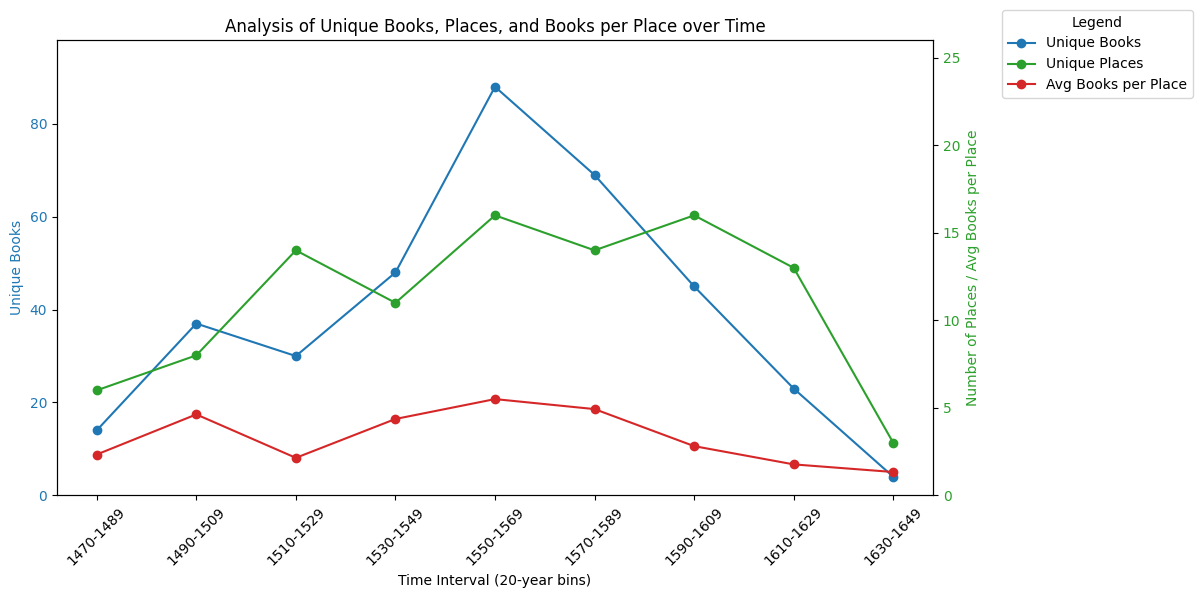

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df and books are your dataframes

# Convert the 'year' columns to integers if they are not already
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create bins for the years (1470-1650, 20-year intervals)
bins = list(range(1470, 1660, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]  # labels like "1470-1489"

# Assign each year in df and books to a bin
df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)
books['year_bin'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Line 1: Number of unique book values per interval in books
book_counts = books.groupby('year_bin')['book'].nunique()

# Line 2: Number of unique place values per interval in books
place_counts = books.groupby('year_bin')['place'].nunique()

# Line 3: Average number of books per unique place in books
book_per_place = books.groupby('year_bin').apply(
    lambda x: x.groupby('place')['book'].nunique().mean()
)

# Create the plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line (unique books) on the left Y-axis
ax1.plot(book_counts.index, book_counts.values, label='Unique Books', marker='o', color='tab:blue')
ax1.set_xlabel('Time Interval (20-year bins)')
ax1.set_ylabel('Unique Books', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Set scaling for the left Y-axis (Unique Books)
ax1.set_ylim(0, book_counts.max() + 10)  # Adjust this based on the range of your data

# Create a second Y-axis to plot number of places and average books per place
ax2 = ax1.twinx()  
ax2.plot(place_counts.index, place_counts.values, label='Unique Places', marker='o', color='tab:green')
ax2.plot(book_per_place.index, book_per_place.values, label='Avg Books per Place', marker='o', color='tab:red')

# Customize the right Y-axis labels
ax2.set_ylabel('Number of Places / Avg Books per Place', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Set scaling for the right Y-axis (Number of Places and Avg Books per Place)
ax2.set_ylim(0, place_counts.max() + 10)  # Adjust this based on the range of your data

# Optionally, you can apply a log scale if the values differ greatly in magnitude
# ax2.set_yscale('log')  # Uncomment this line to set the right Y-axis to log scale

# Customize the plot title and tick labels
plt.title('Analysis of Unique Books, Places, and Books per Place over Time')
ax1.set_xticklabels(book_counts.index, rotation=45)

# Add legend to the plot for index (color and meaning)
fig.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")

# Add a tight layout to avoid overlapping
fig.tight_layout()

# Show the plot
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3818267387.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3818267387.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3818267387.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

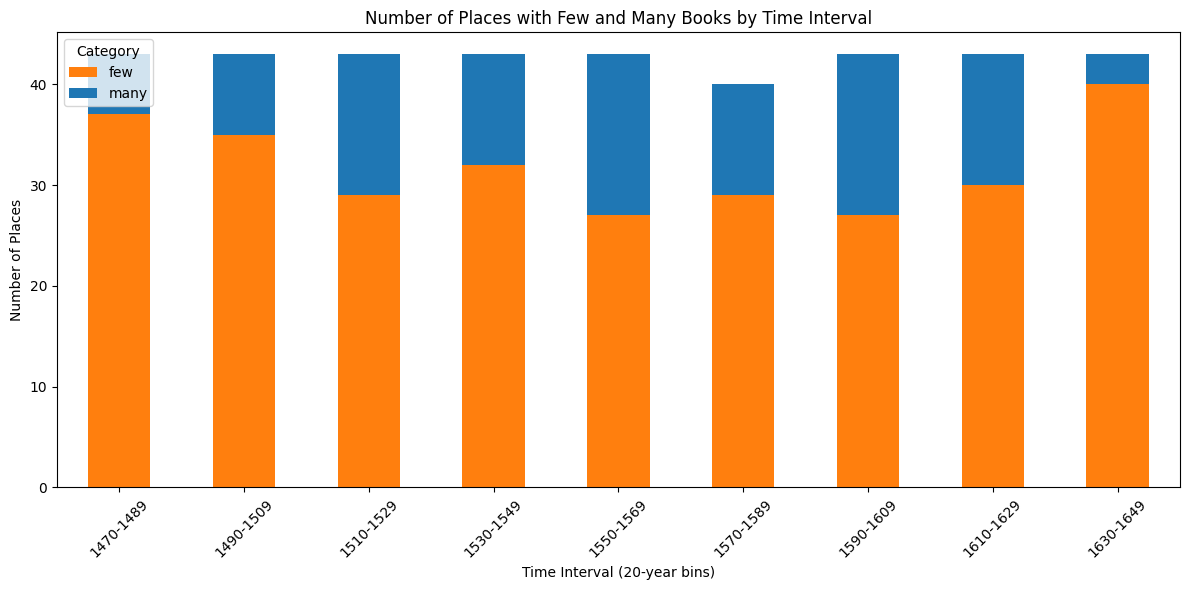

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming books dataframe exists and has 'year_bin', 'place', and 'book'

# Group the data by time bin and place, and count the number of books for each place
place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Define quantile thresholds for "many" and "few" books
def categorize_books(book_counts, lower_quantile=0.25, upper_quantile=0.75):
    """ Categorizes places into 'few', 'many' based on quantiles of book counts. """
    lower_threshold = book_counts.quantile(lower_quantile)
    upper_threshold = book_counts.quantile(upper_quantile)
    return book_counts.apply(
        lambda x: 'few' if x <= lower_threshold else ('many' if x >= upper_threshold else 'medium')
    )

# Create a column for 'many'/'few' based on book counts for each place
place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
    lambda x: categorize_books(x)
)

# Aggregate the number of places in each category (many/few) for each year bin
category_counts = place_book_counts.groupby(['year_bin', 'category']).size().unstack(fill_value=0)

# Plot the number of places with 'many' and 'few' books for each time interval
category_counts[['few', 'many']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['tab:orange', 'tab:blue'])

# Customize the plot
plt.title('Number of Places with Few and Many Books by Time Interval')
plt.xlabel('Time Interval (20-year bins)')
plt.ylabel('Number of Places')
plt.xticks(rotation=45)
plt.legend(title="Category", loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\1973130362.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\1973130362.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\1973130362.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

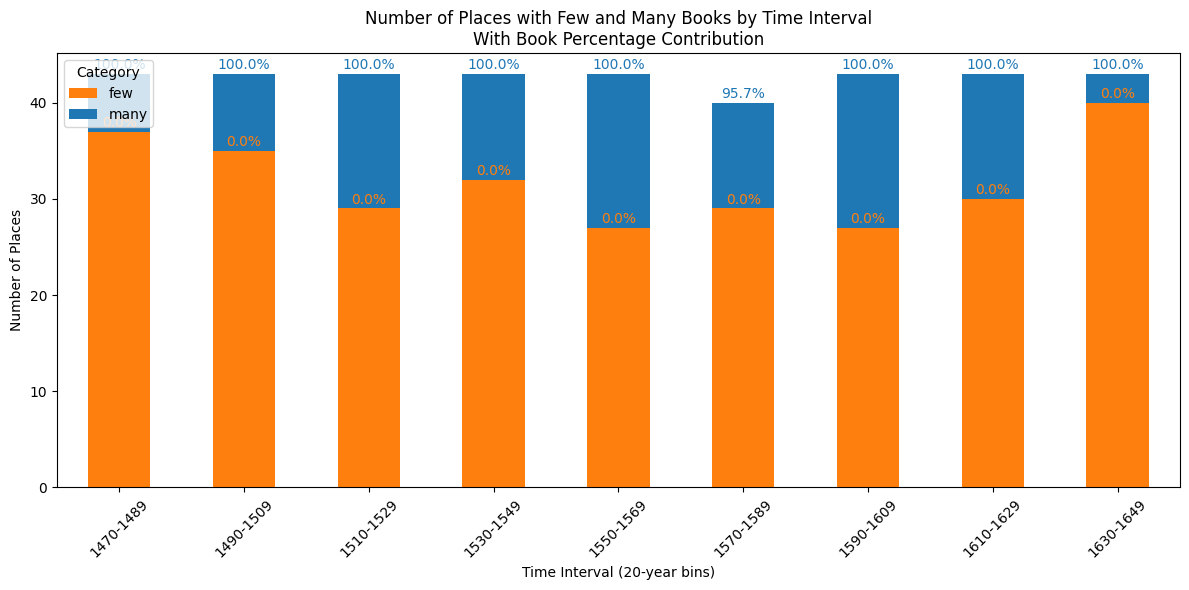

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming books dataframe exists and has 'year_bin', 'place', and 'book'

# Group the data by time bin and place, and count the number of books for each place
place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Define quantile thresholds for "many" and "few" books
def categorize_books(book_counts, lower_quantile=0.25, upper_quantile=0.75):
    """ Categorizes places into 'few', 'many' based on quantiles of book counts. """
    lower_threshold = book_counts.quantile(lower_quantile)
    upper_threshold = book_counts.quantile(upper_quantile)
    return book_counts.apply(
        lambda x: 'few' if x <= lower_threshold else ('many' if x >= upper_threshold else 'medium')
    )

# Create a column for 'many'/'few' based on book counts for each place
place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
    lambda x: categorize_books(x)
)

# Aggregate the number of places in each category (many/few) for each year bin
category_counts = place_book_counts.groupby(['year_bin', 'category']).size().unstack(fill_value=0)

# Calculate the total number of books in each time interval
total_books_per_interval = place_book_counts.groupby('year_bin')['book'].sum()

# Calculate the number of books from 'many' and 'few' places
books_from_many = place_book_counts[place_book_counts['category'] == 'many'].groupby('year_bin')['book'].sum()
books_from_few = place_book_counts[place_book_counts['category'] == 'few'].groupby('year_bin')['book'].sum()

# Calculate the percentage of books from 'many' and 'few' places
percentage_many = (books_from_many / total_books_per_interval) * 100
percentage_few = (books_from_few / total_books_per_interval) * 100

# Plot the number of places with 'many' and 'few' books for each time interval
fig, ax = plt.subplots(figsize=(12, 6))
category_counts[['few', 'many']].plot(kind='bar', stacked=True, ax=ax, color=['tab:orange', 'tab:blue'])

# Annotate the plot with the percentages of books from 'many' and 'few' places
for i, year_bin in enumerate(category_counts.index):
    # Add text annotation for 'many' books
    ax.text(i, category_counts.loc[year_bin, 'many'] + category_counts.loc[year_bin, 'few'] + 0.5, 
            f"{percentage_many[year_bin]:.1f}%", ha='center', color='tab:blue')
    # Add text annotation for 'few' books
    ax.text(i, category_counts.loc[year_bin, 'few'] + 0.5, 
            f"{percentage_few[year_bin]:.1f}%", ha='center', color='tab:orange')

# Customize the plot
plt.title('Number of Places with Few and Many Books by Time Interval\nWith Book Percentage Contribution')
plt.xlabel('Time Interval (20-year bins)')
plt.ylabel('Number of Places')
plt.xticks(rotation=45)
plt.legend(title="Category", loc='upper left')

# Tight layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3572874132.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3572874132.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3572874132.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

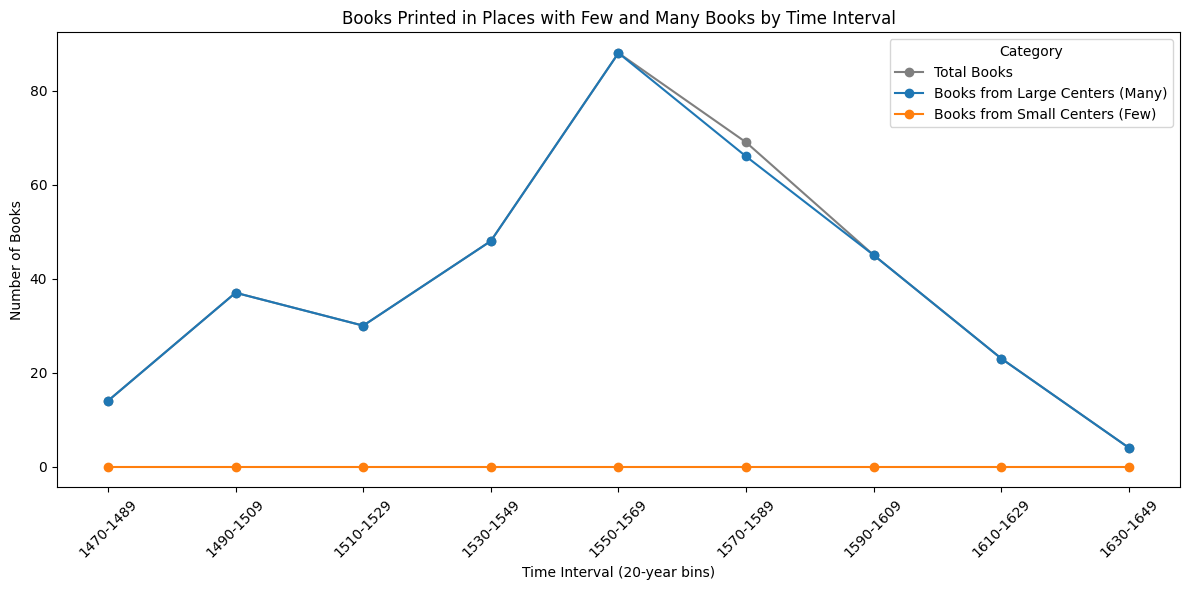

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming books dataframe exists with 'year_bin', 'place', and 'book'

# Group the data by time bin and place, and count the number of books for each place
place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Define quantile thresholds for "many" and "few" books
def categorize_books(book_counts, lower_quantile=0.25, upper_quantile=0.75):
    """ Categorizes places into 'few', 'many' based on quantiles of book counts. """
    lower_threshold = book_counts.quantile(lower_quantile)
    upper_threshold = book_counts.quantile(upper_quantile)
    return book_counts.apply(
        lambda x: 'few' if x <= lower_threshold else ('many' if x >= upper_threshold else 'medium')
    )

# Create a column for 'many'/'few' based on book counts for each place
place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
    lambda x: categorize_books(x)
)

# Calculate the total number of books in each time interval
total_books_per_interval = place_book_counts.groupby('year_bin')['book'].sum()

# Calculate the number of books from 'many' and 'few' places
books_from_many = place_book_counts[place_book_counts['category'] == 'many'].groupby('year_bin')['book'].sum()
books_from_few = place_book_counts[place_book_counts['category'] == 'few'].groupby('year_bin')['book'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot the total number of books, books from "many" places, and books from "few" places
plt.plot(total_books_per_interval.index, total_books_per_interval.values, label='Total Books', color='tab:gray', linestyle='-', marker='o')
plt.plot(books_from_many.index, books_from_many.values, label='Books from Large Centers (Many)', color='tab:blue', linestyle='-', marker='o')
plt.plot(books_from_few.index, books_from_few.values, label='Books from Small Centers (Few)', color='tab:orange', linestyle='-', marker='o')

# Customize the plot
plt.title('Books Printed in Places with Few and Many Books by Time Interval')
plt.xlabel('Time Interval (20-year bins)')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()

# Show the plot
plt.show()


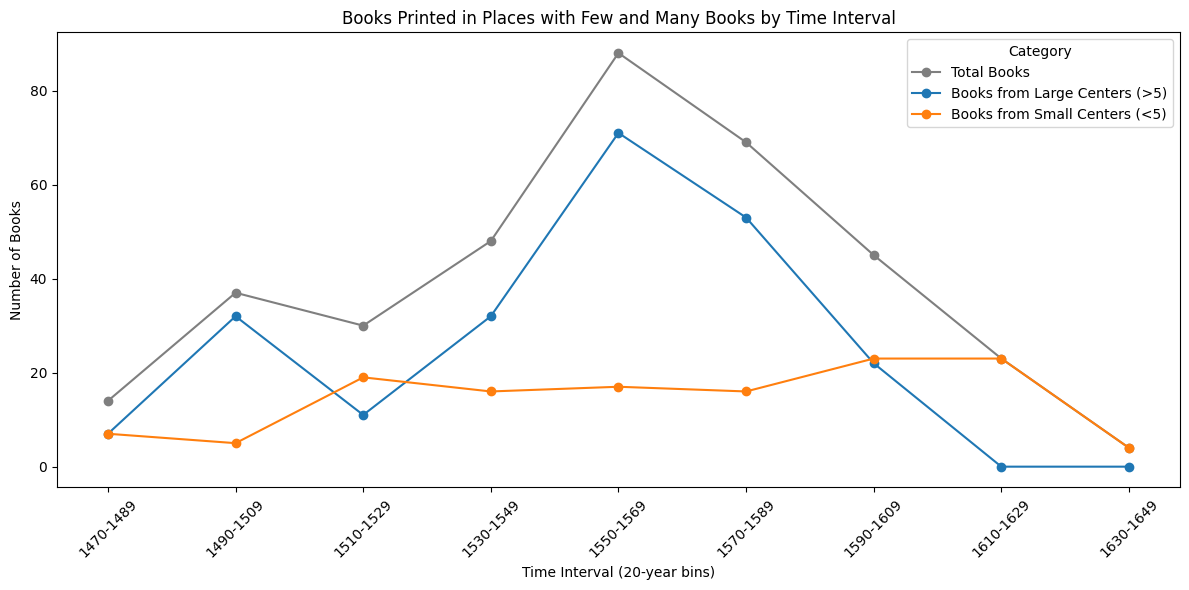

In [65]:
# Group the data by time bin and place, and count the number of books for each place
place_book_counts = books.groupby(['year_bin', 'place'], observed=False)['book'].nunique().reset_index()

# Define categorization for small and large centers based on a fixed threshold of 5 books
def categorize_books(book_counts, threshold=5):
    """ Categorizes places into 'small' and 'large' based on a fixed threshold of book counts. """
    return book_counts.apply(
        lambda x: 'small' if x < threshold else 'large'
    )

# Create a column for 'small'/'large' based on book counts for each place
place_book_counts['category'] = place_book_counts.groupby('year_bin', observed=False)['book'].transform(
    lambda x: categorize_books(x)
)

# Calculate the total number of books in each time interval
total_books_per_interval = place_book_counts.groupby('year_bin', observed=False)['book'].sum()

# Calculate the number of books from 'large' and 'small' places
books_from_large = place_book_counts[place_book_counts['category'] == 'large'].groupby('year_bin', observed=False)['book'].sum()
books_from_small = place_book_counts[place_book_counts['category'] == 'small'].groupby('year_bin', observed=False)['book'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot the total number of books, books from "large" places, and books from "small" places
plt.plot(total_books_per_interval.index, total_books_per_interval.values, label='Total Books', color='tab:gray', linestyle='-', marker='o')
plt.plot(books_from_large.index, books_from_large.values, label='Books from Large Centers (>5)', color='tab:blue', linestyle='-', marker='o')
plt.plot(books_from_small.index, books_from_small.values, label='Books from Small Centers (<5)', color='tab:orange', linestyle='-', marker='o')

# Customize the plot
plt.title('Books Printed in Places with Few and Many Books by Time Interval')
plt.xlabel('Time Interval (20-year bins)')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()

# Show the plot
plt.show()


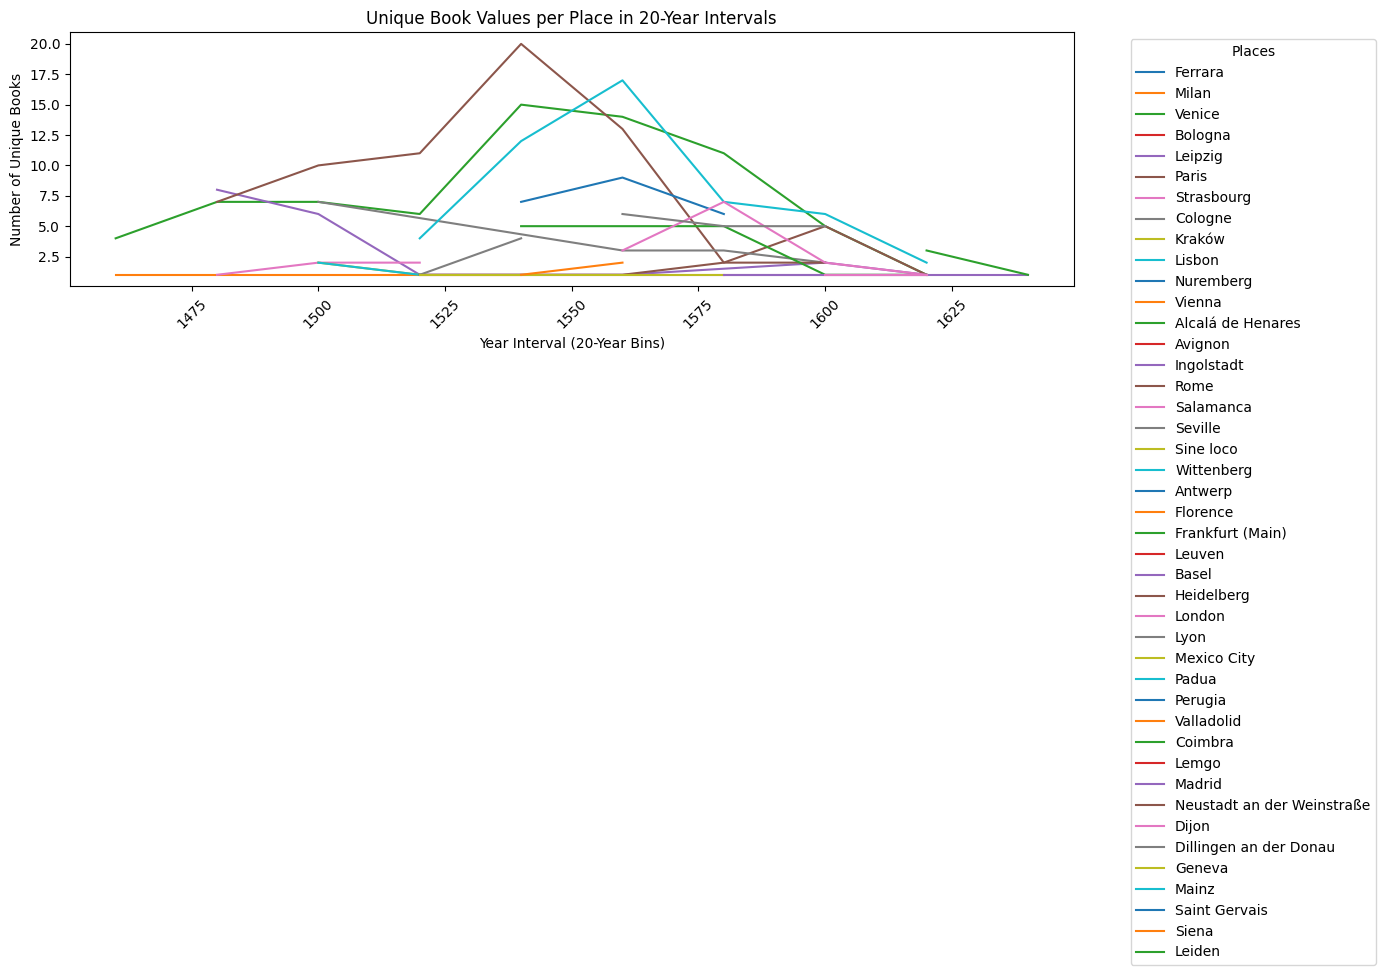

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the 'year_bin' column for books DataFrame (20-year intervals)
books['year_bin'] = (books['year'] // 20) * 20

# Group by 'year_bin' and 'place', and count the unique number of books for each place in each interval
place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Plot the line graph for unique books per place
plt.figure(figsize=(14, 7))

for place in place_book_counts['place'].unique():
    place_data = place_book_counts[place_book_counts['place'] == place]
    plt.plot(place_data['year_bin'], place_data['book'], label=place)

# Customize the plot
plt.title('Unique Book Values per Place in 20-Year Intervals')
plt.xlabel('Year Interval (20-Year Bins)')
plt.ylabel('Number of Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Places', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


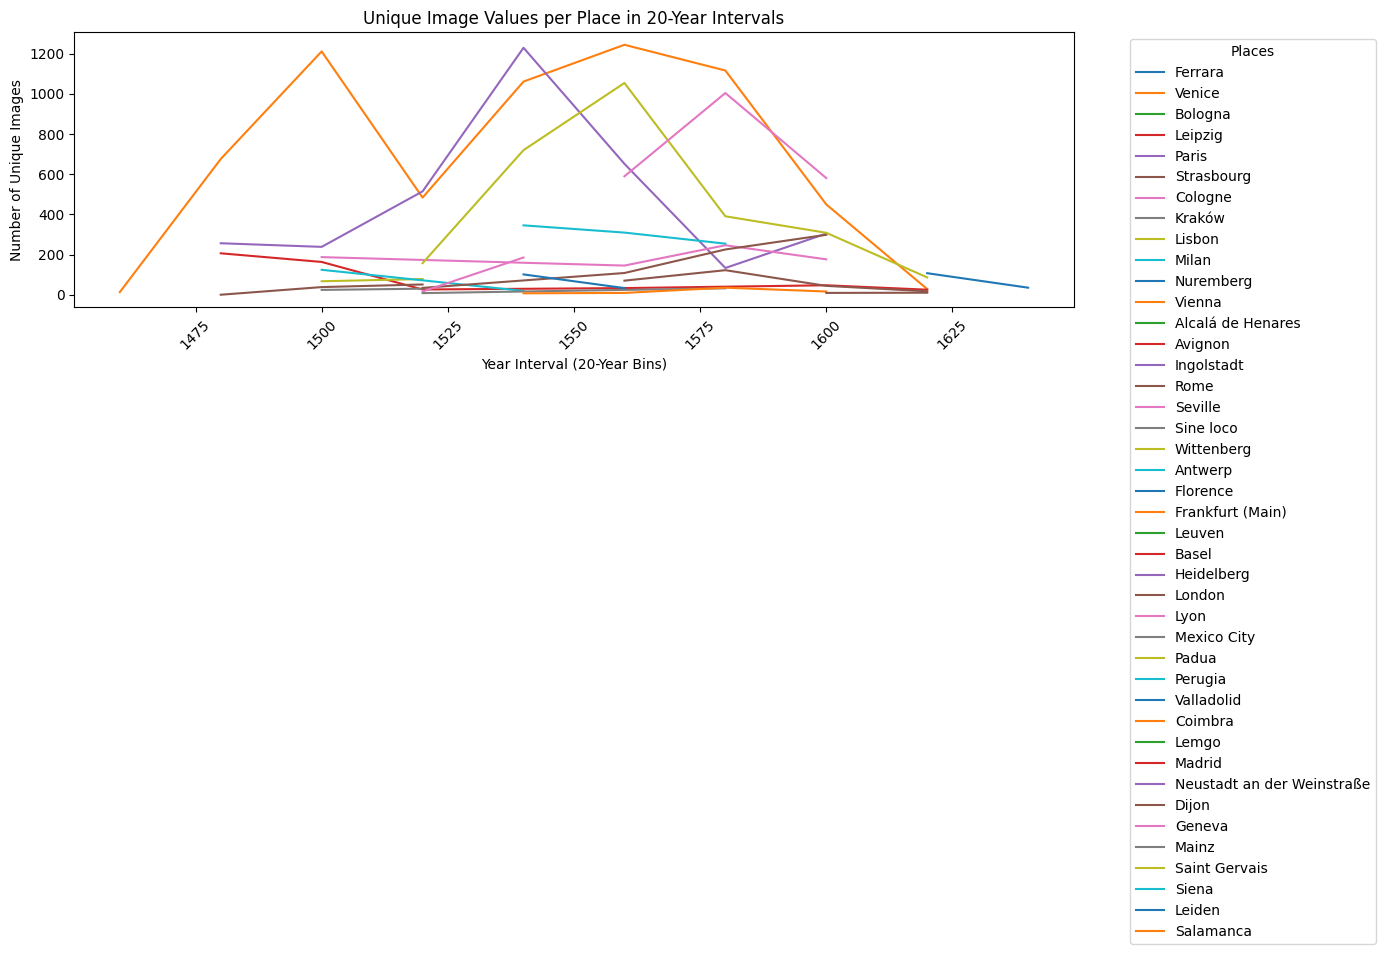

In [75]:
# Create the 'year_bin' column for df DataFrame (20-year intervals)
df['year_bin'] = (df['year'] // 20) * 20

# Group by 'year_bin' and 'place', and count the unique number of images for each place in each interval
place_image_counts = df.groupby(['year_bin', 'place'])['images'].nunique().reset_index()

# Plot the line graph for unique images per place
plt.figure(figsize=(14, 7))

for place in place_image_counts['place'].unique():
    place_data = place_image_counts[place_image_counts['place'] == place]
    plt.plot(place_data['year_bin'], place_data['images'], label=place)

# Customize the plot
plt.title('Unique Image Values per Place in 20-Year Intervals')
plt.xlabel('Year Interval (20-Year Bins)')
plt.ylabel('Number of Unique Images')
plt.xticks(rotation=45)
plt.legend(title='Places', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\2019377408.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  small_large_centers = place_book_counts.groupby('year_bin').apply(


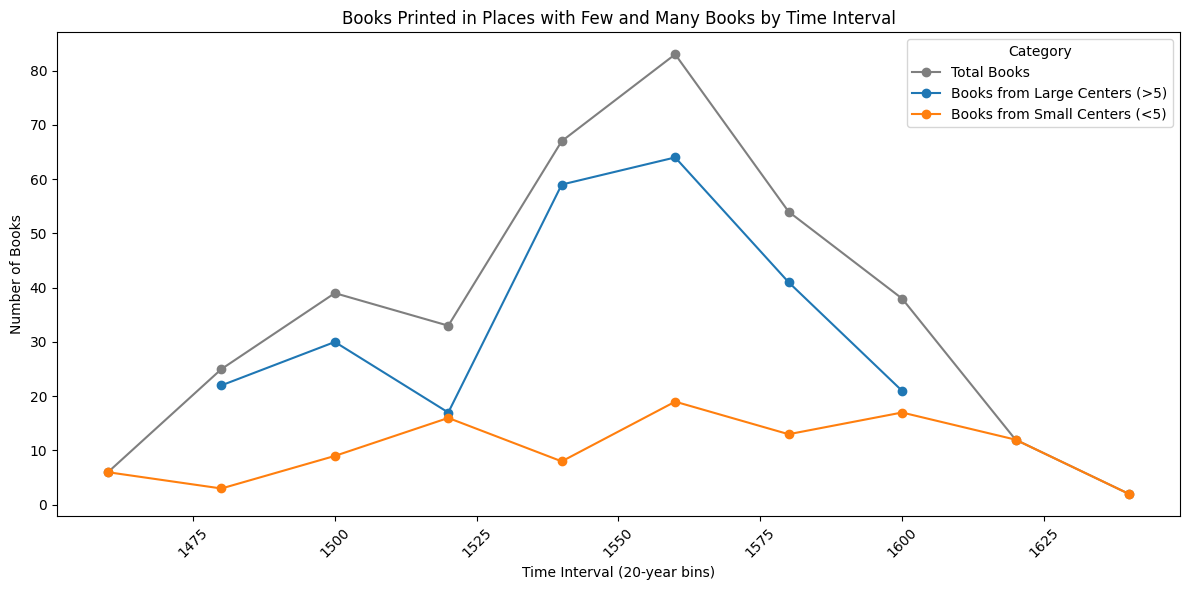


Time Interval: 1460
Small Centers (fewer than 5 books):
  Ferrara: 1 books
  Milan: 1 books
  Venice: 4 books
Large Centers (5 or more books):

Time Interval: 1480
Small Centers (fewer than 5 books):
  Bologna: 2 books
  Strasbourg: 1 books
Large Centers (5 or more books):
  Leipzig: 8 books
  Paris: 7 books
  Venice: 7 books

Time Interval: 1500
Small Centers (fewer than 5 books):
  Kraków: 2 books
  Lisbon: 2 books
  Milan: 1 books
  Nuremberg: 1 books
  Strasbourg: 2 books
  Vienna: 1 books
Large Centers (5 or more books):
  Cologne: 7 books
  Leipzig: 6 books
  Paris: 10 books
  Venice: 7 books

Time Interval: 1520
Small Centers (fewer than 5 books):
  Alcalá de Henares: 1 books
  Avignon: 1 books
  Ingolstadt: 1 books
  Kraków: 1 books
  Leipzig: 1 books
  Lisbon: 1 books
  Rome: 1 books
  Salamanca: 1 books
  Seville: 1 books
  Sine loco: 1 books
  Strasbourg: 2 books
  Wittenberg: 4 books
Large Centers (5 or more books):
  Paris: 11 books
  Venice: 6 books

Time Interval: 1540


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming books dataframe exists with 'year_bin', 'place', and 'book'

# Group the data by time bin and place, and count the number of books for each place
place_book_counts = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Define categorization for small and large centers based on a fixed threshold of 5 books
def categorize_books(book_counts, threshold=5):
    """ Categorizes places into 'small' and 'large' based on a fixed threshold of book counts. """
    return book_counts.apply(
        lambda x: 'small' if x < threshold else 'large'
    )

# Create a column for 'small'/'large' based on book counts for each place
place_book_counts['category'] = place_book_counts.groupby('year_bin')['book'].transform(
    lambda x: categorize_books(x)
)

# Filter places that printed at least 1 book (i.e., exclude places with 0 books)
place_book_counts = place_book_counts[place_book_counts['book'] > 0]

# Calculate the total number of books in each time interval
total_books_per_interval = place_book_counts.groupby('year_bin')['book'].sum()

# Calculate the number of books from 'large' and 'small' places
books_from_large = place_book_counts[place_book_counts['category'] == 'large'].groupby('year_bin')['book'].sum()
books_from_small = place_book_counts[place_book_counts['category'] == 'small'].groupby('year_bin')['book'].sum()

# Create a dictionary to store the small and large centers per interval along with their book counts
small_large_centers = place_book_counts.groupby('year_bin').apply(
    lambda x: {
        'small': x[x['category'] == 'small'][['place', 'book']].set_index('place').to_dict()['book'],
        'large': x[x['category'] == 'large'][['place', 'book']].set_index('place').to_dict()['book']
    }
).to_dict()

# Plot the line chart
plt.figure(figsize=(12, 6))

# Plot the total number of books, books from "large" places, and books from "small" places
plt.plot(total_books_per_interval.index, total_books_per_interval.values, label='Total Books', color='tab:gray', linestyle='-', marker='o')
plt.plot(books_from_large.index, books_from_large.values, label='Books from Large Centers (>5)', color='tab:blue', linestyle='-', marker='o')
plt.plot(books_from_small.index, books_from_small.values, label='Books from Small Centers (<5)', color='tab:orange', linestyle='-', marker='o')

# Customize the plot
plt.title('Books Printed in Places with Few and Many Books by Time Interval')
plt.xlabel('Time Interval (20-year bins)')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()

# Show the plot
plt.show()

# Print the list of small and large centers along with the number of books printed in each city
for year_bin, data in small_large_centers.items():
    print(f"\nTime Interval: {year_bin}")
    
    # Small centers and their book counts (filtering for at least 1 book)
    print("Small Centers (fewer than 5 books):")
    for place, book_count in data['small'].items():
        if book_count > 0:
            print(f"  {place}: {book_count} books")
    
    # Large centers and their book counts (filtering for at least 1 book)
    print("Large Centers (5 or more books):")
    for place, book_count in data['large'].items():
        if book_count > 0:
            print(f"  {place}: {book_count} books")


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3264209124.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_counts = books.groupby('year_bin')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3264209124.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts = df.groupby('year_bin')['images'].nunique()


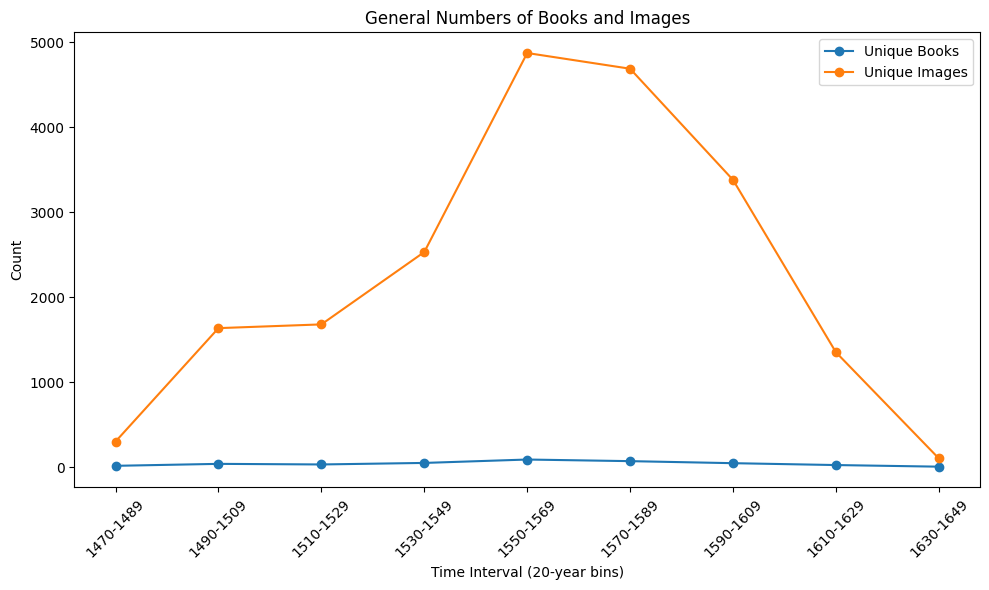

C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\860692369.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  book_counts = books.groupby('year_bin')['book'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\860692369.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts = df.groupby('year_bin')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\860692369.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(book_counts.index, rotation=45)


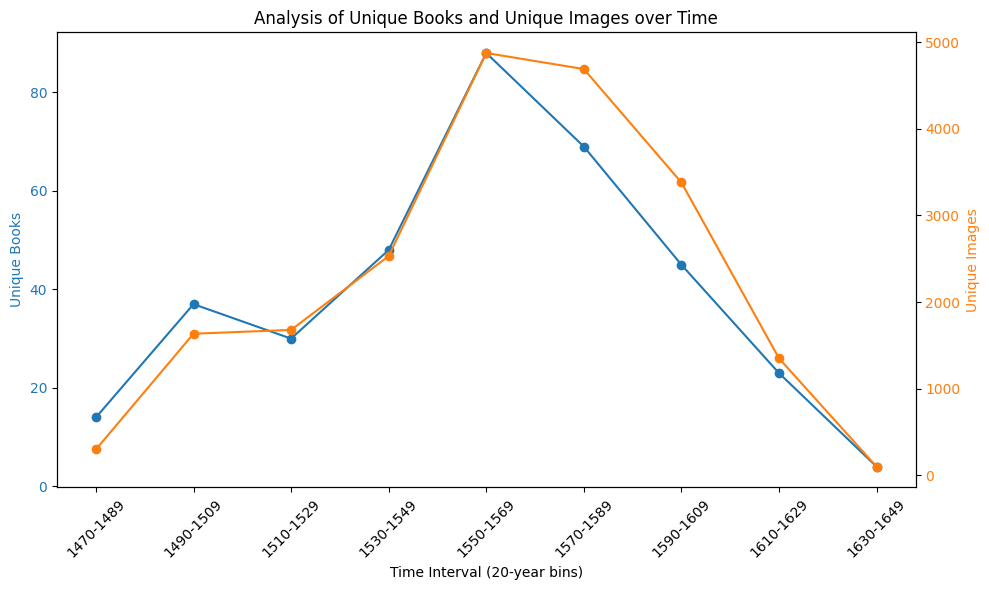

C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\475013295.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_per_place = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()


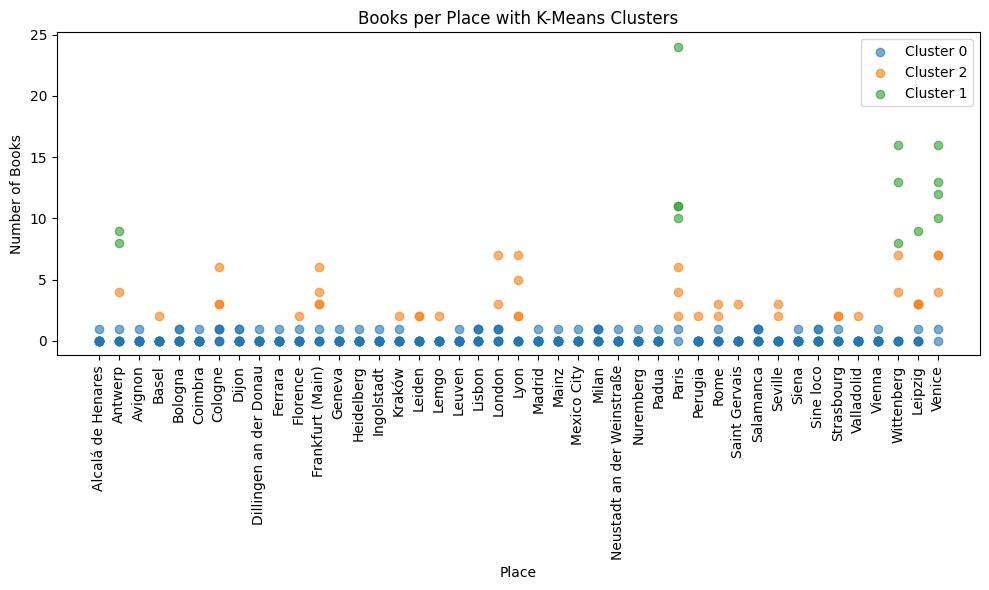

Average number of books per cluster: cluster
0     0.141141
1    12.142857
2     3.525000
Name: book, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'books' is your DataFrame and 'place' and 'book' are columns
# Group by year_bin and place, and calculate the number of unique books per place
books_per_place = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Let's focus on the number of books per place for clustering
X = books_per_place['book'].values.reshape(-1, 1)

# Apply K-Means Clustering to identify groups of places with similar book counts
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (3 is just an example)
books_per_place['cluster'] = kmeans.fit_predict(X)

# Now, we can plot the results
plt.figure(figsize=(10, 6))

# Plot the number of books per place with cluster labels
for cluster in books_per_place['cluster'].unique():
    cluster_data = books_per_place[books_per_place['cluster'] == cluster]
    plt.scatter(cluster_data['place'], cluster_data['book'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Place')
plt.ylabel('Number of Books')
plt.title('Books per Place with K-Means Clusters')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Optionally, you can also analyze the clusters (e.g., mean book count per cluster)
cluster_means = books_per_place.groupby('cluster')['book'].mean()
print("Average number of books per cluster:", cluster_means)


C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\1818584853.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_per_place = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()


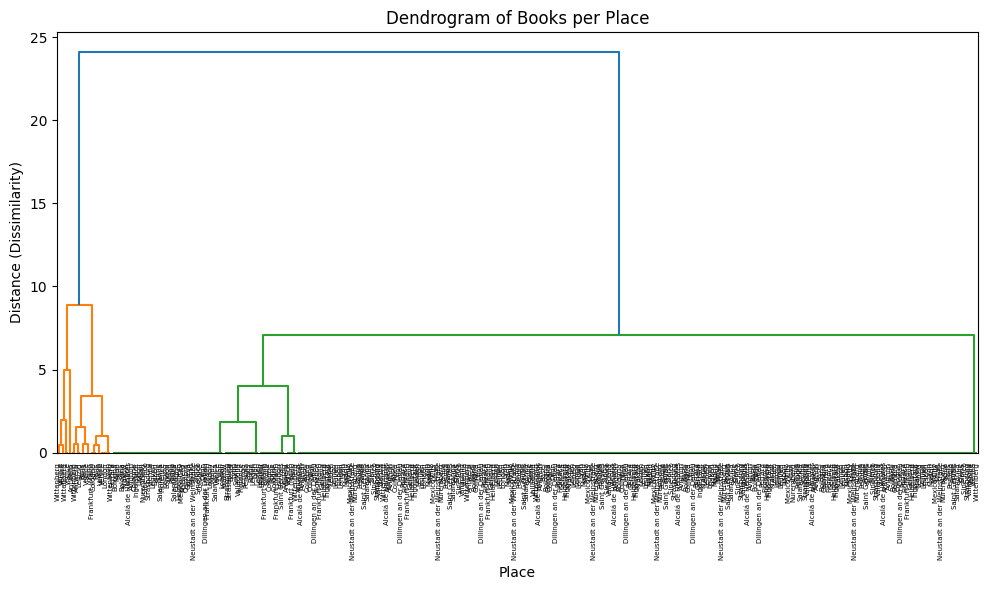

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Assuming 'books' is your DataFrame and you have already computed the number of books per place
# Group by place and year_bin, then calculate the number of unique books per place
books_per_place = books.groupby(['year_bin', 'place'])['book'].nunique().reset_index()

# Extract the number of books per place (the "y-axis" in your original scatter plot)
book_counts = books_per_place['book'].values.reshape(-1, 1)

# Optionally, scale the data (helps when there are wide variations in the number of books)
scaler = StandardScaler()
book_counts_scaled = scaler.fit_transform(book_counts)

# Perform hierarchical clustering using the 'ward' method (minimizes variance within clusters)
Z = linkage(book_counts_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=books_per_place['place'].values, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram of Books per Place')
plt.xlabel('Place')
plt.ylabel('Distance (Dissimilarity)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [12]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at a certain height to form clusters
max_d = 10  # Example: Cut the tree where distance < 10
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to the data
books_per_place['cluster'] = clusters

# Show the places with their assigned clusters
print(books_per_place[['place', 'cluster']])


                 place  cluster
0    Alcalá de Henares        1
1              Antwerp        1
2              Avignon        1
3                Basel        1
4              Bologna        1
..                 ...      ...
382         Strasbourg        1
383         Valladolid        1
384             Venice        1
385             Vienna        1
386         Wittenberg        1

[387 rows x 2 columns]


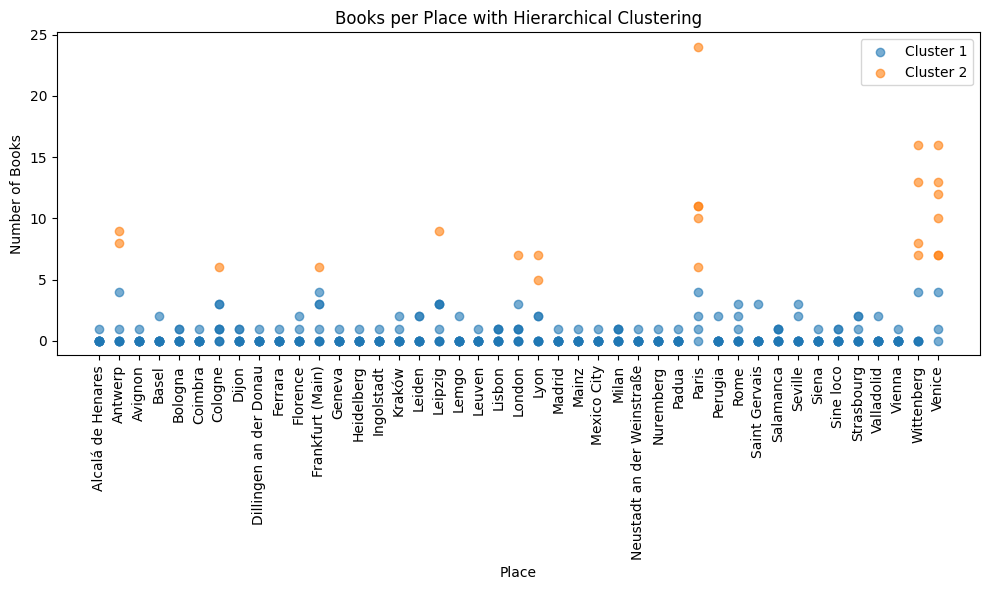

In [13]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in books_per_place['cluster'].unique():
    cluster_data = books_per_place[books_per_place['cluster'] == cluster]
    plt.scatter(cluster_data['place'], cluster_data['book'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Place')
plt.ylabel('Number of Books')
plt.title('Books per Place with Hierarchical Clustering')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


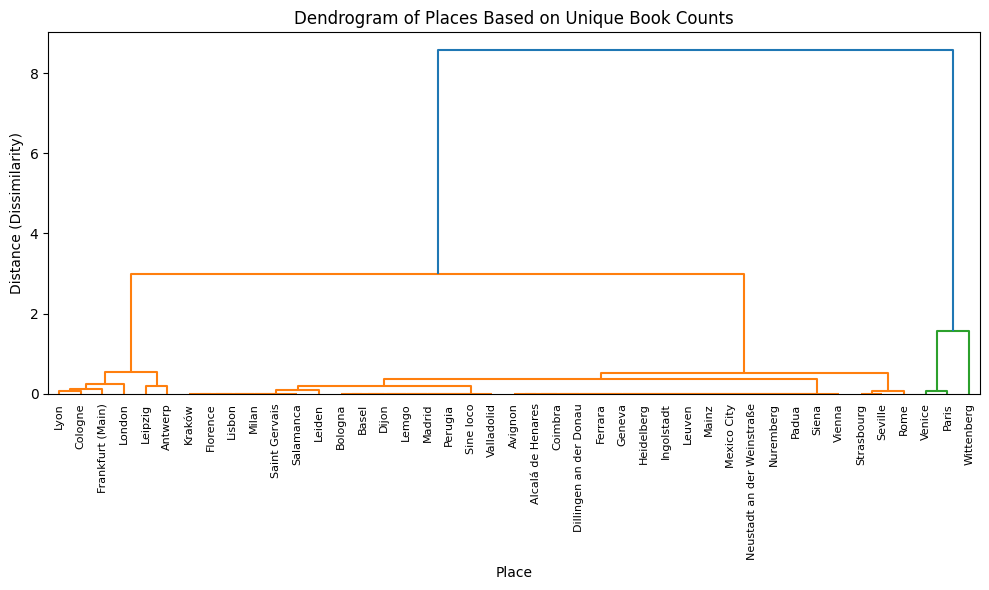

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Step 1: Calculate the number of unique books per place
# Assuming 'books' is your dataframe, and it has columns 'place' and 'book'
books_per_place = books.groupby('place')['book'].nunique().reset_index()

# Step 2: Extract the unique book counts
book_counts = books_per_place['book'].values.reshape(-1, 1)

# Optionally, scale the data (helps when there are wide variations in book counts)
scaler = StandardScaler()
book_counts_scaled = scaler.fit_transform(book_counts)

# Step 3: Perform hierarchical clustering using the 'ward' method (minimizes variance within clusters)
Z = linkage(book_counts_scaled, method='ward')

# Step 4: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=books_per_place['place'].values, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram of Places Based on Unique Book Counts')
plt.xlabel('Place')
plt.ylabel('Distance (Dissimilarity)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Books count per year bin:
year_bin
1470    14
1490    37
1510    30
1530    48
1550    88
1570    69
1590    45
1610    23
1630     4
1650     1
dtype: int64


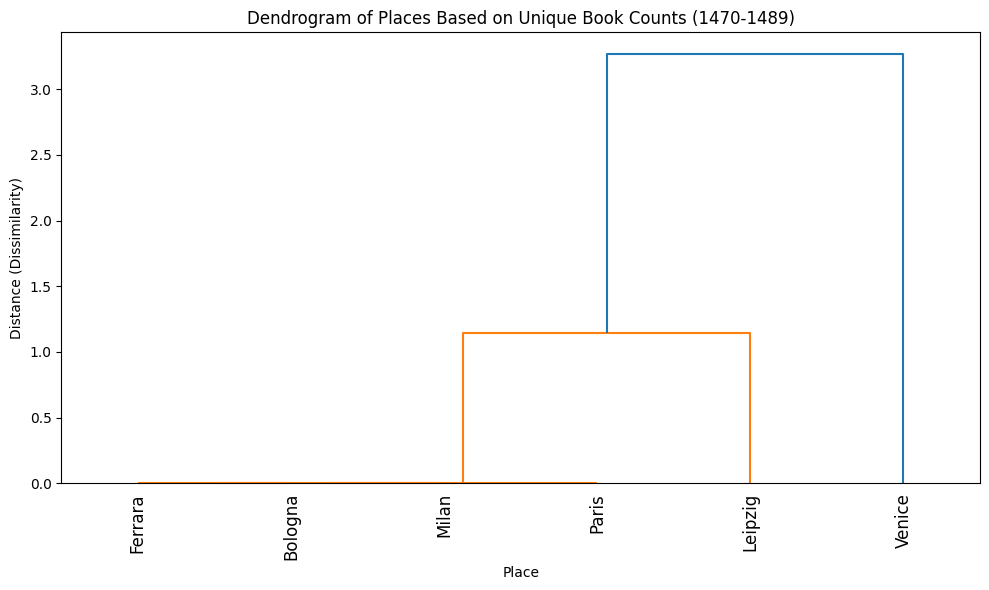

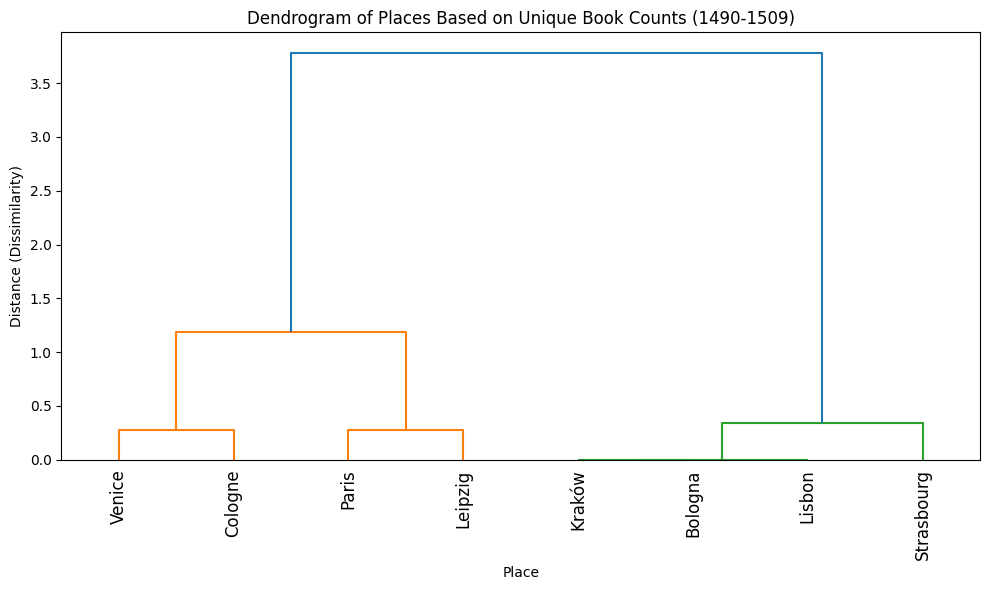

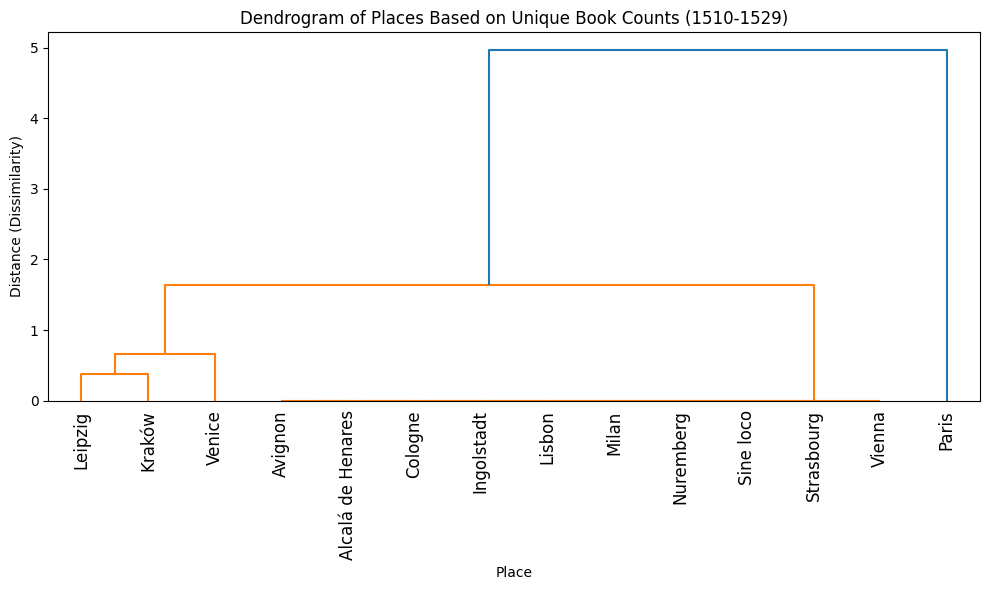

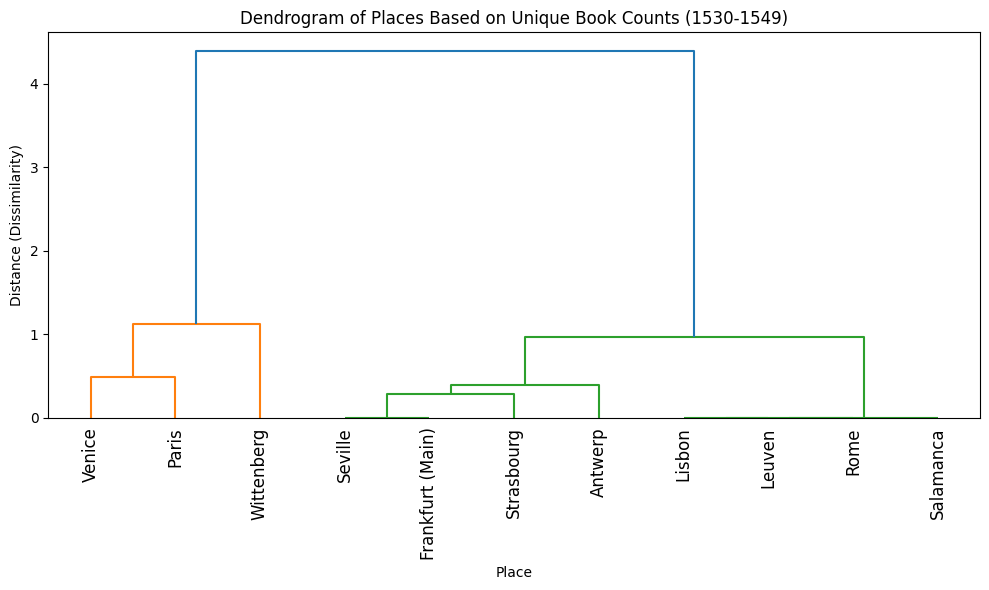

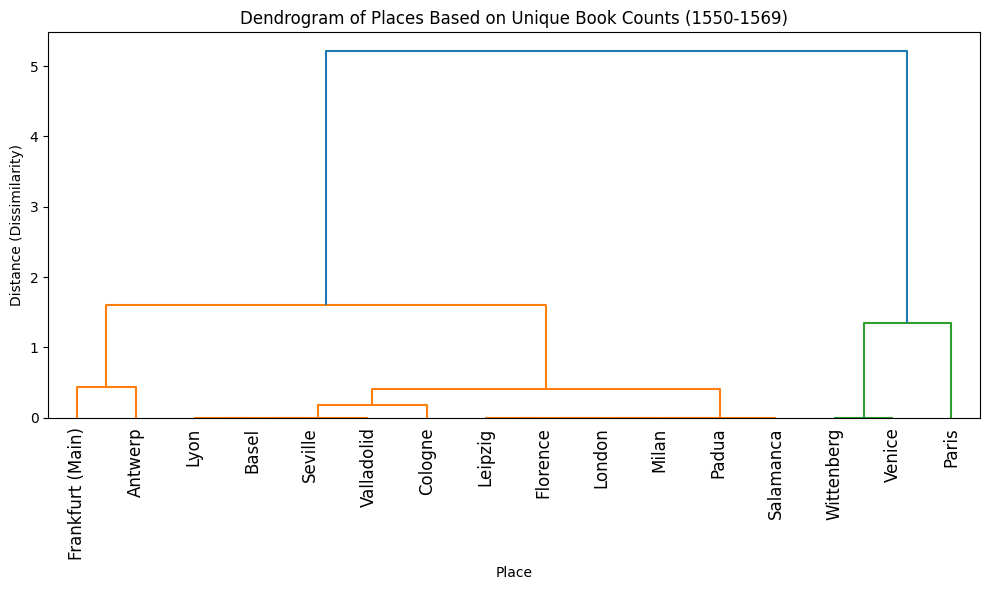

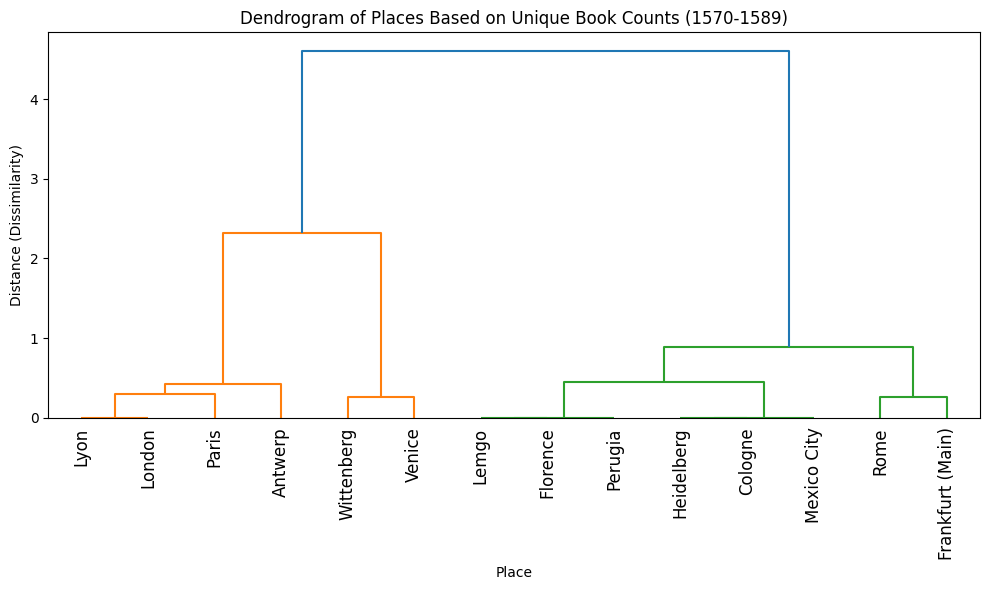

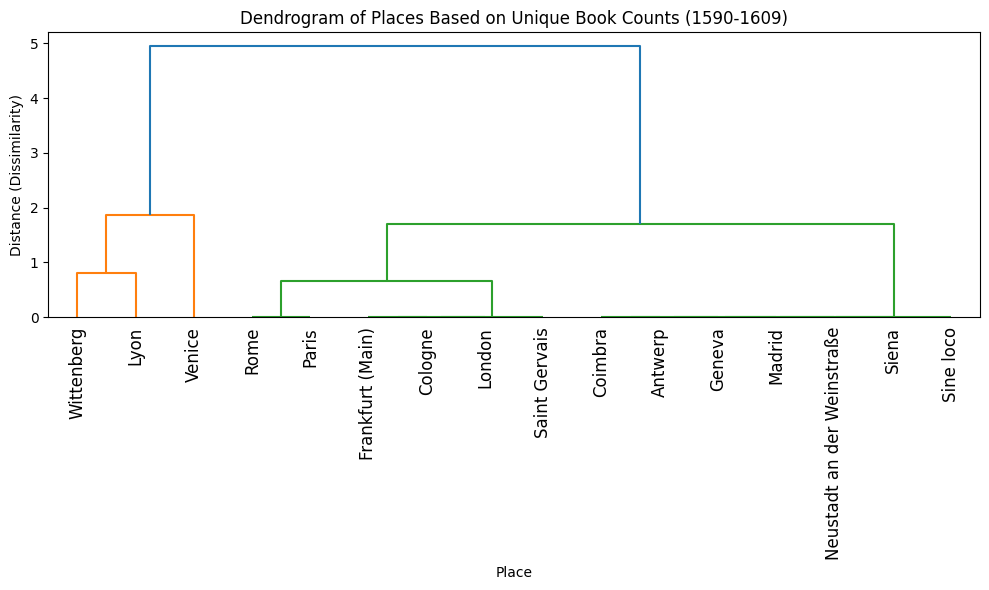

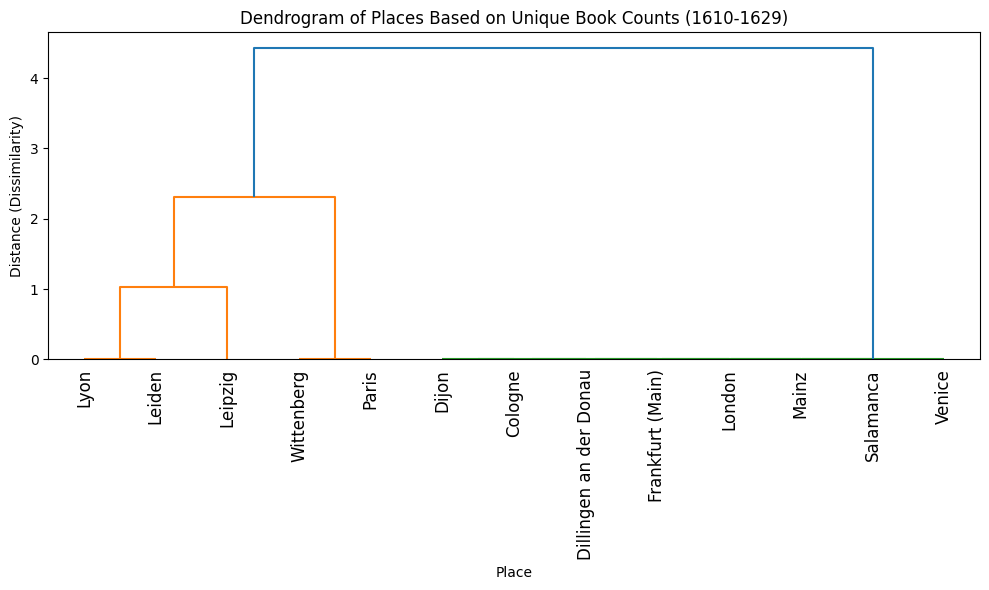

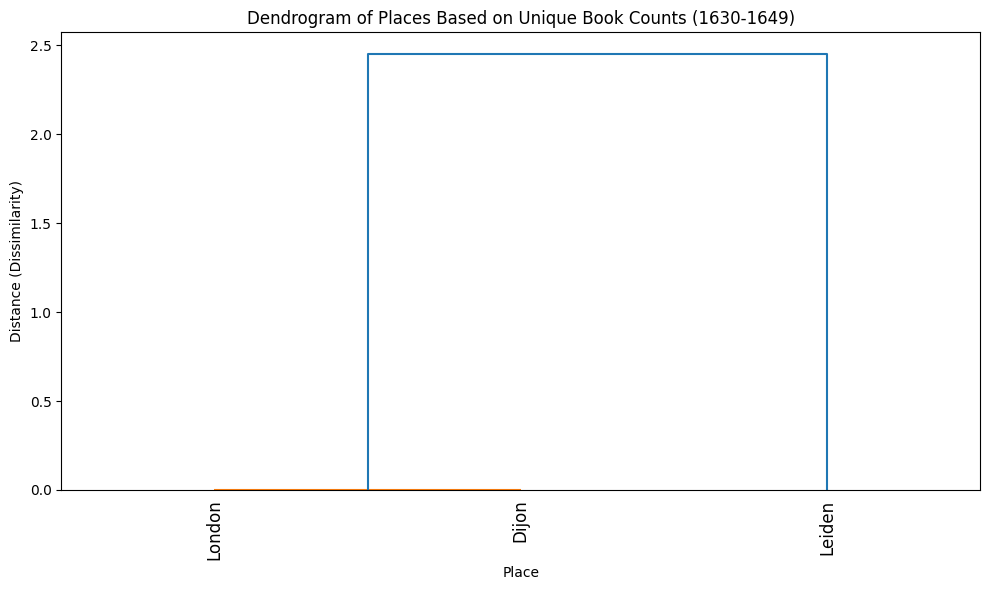

C:\Users\nogas\AppData\Local\Temp\ipykernel_9712\3232242159.py:45: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(book_counts_scaled, method='ward')


ValueError: The number of observations cannot be determined on an empty distance matrix.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Filter books between 1470 and 1650
books_filtered = books[(books['year'] >= 1470) & (books['year'] <= 1650)]

# Step 1: Create 20-year intervals (adjusted)
# Instead of using floor division, use a range with a lower bound starting at 1470
books_filtered['year_bin'] = ((books_filtered['year'] - 1470) // 20) * 20 + 1470

# Step 2: Check how many unique books there are in each 20-year bin
year_bins_counts = books_filtered.groupby('year_bin').size()
print(f"Books count per year bin:\n{year_bins_counts}")

# Step 3: Loop through each 20-year interval from 1470 to 1650
for year_bin in range(1470, 1660, 20):  # Start at 1470, increment by 20 until 1650
    # Filter books for the current year_bin
    books_in_bin = books_filtered[books_filtered['year_bin'] == year_bin]

    # Check if there are any books in this interval
    if books_in_bin.shape[0] == 0:
        print(f"No data available for the year bin {year_bin}-{year_bin+19}. Skipping.")
        continue  # Skip to the next iteration if no data is found
    
    # Step 4: Calculate the number of unique books per place within this time interval
    books_per_place = books_in_bin.groupby('place')['book'].nunique().reset_index()

    # Check if there are places with books in this interval
    if books_per_place.shape[0] == 0:
        print(f"No places with books in the year bin {year_bin}-{year_bin+19}. Skipping.")
        continue  # Skip to the next iteration if no places are found

    # Step 5: Extract the unique book counts for clustering
    book_counts = books_per_place['book'].values.reshape(-1, 1)

    # Check if book_counts is not empty
    if book_counts.shape[0] > 0:  # Only proceed if there are books in this interval
        # Step 6: Optionally, scale the data (helps when there are wide variations in book counts)
        scaler = StandardScaler()
        book_counts_scaled = scaler.fit_transform(book_counts)

        # Step 7: Perform hierarchical clustering using the 'ward' method
        Z = linkage(book_counts_scaled, method='ward')

        # Step 8: Plot the dendrogram for this time interval
        plt.figure(figsize=(10, 6))
        dendrogram(Z, labels=books_per_place['place'].values, orientation='top', 
                   distance_sort='descending', show_leaf_counts=False)
        plt.title(f'Dendrogram of Places Based on Unique Book Counts ({year_bin}-{year_bin+19})')
        plt.xlabel('Place')
        plt.ylabel('Distance (Dissimilarity)')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid book counts for the year bin {year_bin}-{year_bin+19}. Skipping.")
